In [1]:
import pandas as pd
import glob
import re
from tqdm import tqdm
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Part 1

Code given and modified

In [2]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion', 'Sample_group', 'Subject_id']) # initialisation of the dataframe
xtree = et.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):
            temp_cns_subregion = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "sample group"):
            temp_sample_group = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "subject id"):
            temp_subject_id = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id.strip()], 'Cns_subregion': [temp_cns_subregion.strip()], 'Sample_group': [temp_sample_group.strip()], 'Subject_id': [temp_subject_id.strip()]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [3]:
data_annotation

Sample_id   Cns_subregion      Sample_group   Subject_id
0   GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6
0   GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP
0   GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ
0   GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2
0   GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND
..         ...             ...               ...          ...
0   GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4
0   GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL
0   GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW
0   GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL
0   GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1

[176 rows x 4 columns]

In [4]:
data_annotation['Cns_subregion'].unique()

array(['Frontal Cortex', 'Motor Cortex (Medial)',
       'Motor Cortex (Lateral)', 'Motor Cortex'], dtype=object)

In [5]:
data_annotation['Sample_group'].unique()

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

In [6]:
len(data_annotation['Subject_id'].unique())

95

Code given :

In [7]:
import pandas as pd
import glob
import re

path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list

In [8]:
pdList

[                        GSM3533340
 A1BG                            48
 A1BG-AS1                       114
 A1CF                             0
 A2M                            572
 A2M-AS1                         68
 ...                            ...
 X8_LINE:CR1:LINE               283
 X9_LINE:L1:LINE                 94
 Zaphod2:hAT-Tip100:DNA         277
 Zaphod3:hAT-Tip100:DNA         961
 Zaphod:hAT-Tip100:DNA         1153
 
 [28953 rows x 1 columns],
                         GSM3533293
 A1BG                            38
 A1BG-AS1                       166
 A1CF                             0
 A2M                           5970
 A2M-AS1                        190
 ...                            ...
 X8_LINE:CR1:LINE               466
 X9_LINE:L1:LINE                129
 Zaphod2:hAT-Tip100:DNA         549
 Zaphod3:hAT-Tip100:DNA        1618
 Zaphod:hAT-Tip100:DNA         2049
 
 [28953 rows x 1 columns],
                         GSM3533379
 A1BG                            50
 A1BG-

In [9]:
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix = data_matrix.transpose() # transpose the dataframe to get a more standard shape (samples x variables)

In [10]:
data_matrix

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533340    48       114     0   572       68    116      1        1   
GSM3533293    38       166     0  5970      190    153      0        0   
GSM3533379    50       101     0  2316       85    183      7        3   
GSM3533365    32        91     0  2537       87     84      2        1   
GSM3533307    18        69     0   946       55     74      0        4   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533332    41        60     0  1233      116    153      4        0   
GSM3533295    39        78     0  1381       80    130      2        5   
GSM3533368    16        98     0  1291       85    152      0        2   
GSM3533235    15        39     0   957       74     48      1        2   
GSM3533285    37       136     0  2595       88    162      0        1   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533340      20      1  ...                541               1211   
GSM3533293     129      1  ...                980               1951   
GSM3533379      23      0  ...                731               1650   
GSM3533365      42      1  ...                637               1505   
GSM3533307       4      2  ...                568               1401   
...            ...    ...  ...                ...                ...   
GSM3533332       8      0  ...                758               1844   
GSM3533295      10      1  ...                739               1478   
GSM3533368      20      1  ...                866               1938   
GSM3533235      21      0  ...                446               1066   
GSM3533285      26      0  ...               1032               2523   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533340               1291                612                 73   
GSM3533293               1968                976                101   
GSM3533379               1596                837                 90   
GSM3533365               1384                724                 90   
GSM3533307               1148                703                 56   
...                       ...                ...                ...   
GSM3533332               1730                891                 79   
GSM3533295               1416                737                 79   
GSM3533368               1823               1075                 91   
GSM3533235               1022                635                 63   
GSM3533285               2216               1399                131   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533340               283               94                     277   
GSM3533293               466              129                     549   
GSM3533379               407              104                     368   
GSM3533365               358               65                     348   
GSM3533307               410               81                     334   
...                      ...              ...                     ...   
GSM3533332               435              105                     403   
GSM3533295               414               94                     329   
GSM3533368               553              130                     448   
GSM3533235               267               65                     256   
GSM3533285               717              183                     605   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533340                     961                   1153  
GSM3533293                    1618                   2049  
GSM3533379                    1550                   1666  
GSM3533365                    1408                   1409  
GSM3533307                    1213                   1210  
...                            ...                    ...  
GSM3533332                    1251                   1453  
GSM3533295                    1186              

In [11]:
list_genes = list(data_matrix.columns.values)
list_genes

['A1BG',
 'A1BG-AS1',
 'A1CF',
 'A2M',
 'A2M-AS1',
 'A2ML1',
 'A2MP1',
 'A3GALT2',
 'A4GALT',
 'A4GNT',
 'AA06',
 'AAAS',
 'AACS',
 'AACSP1',
 'AADAC',
 'AADACL2',
 'AADACL2-AS1',
 'AADACL3',
 'AADACL4',
 'AADACP1',
 'AADAT',
 'AAED1',
 'AAGAB',
 'AAK1',
 'AAMDC',
 'AAMP',
 'AANAT',
 'AAR2',
 'AARD',
 'AARS',
 'AARS2',
 'AARSD1',
 'AASDH',
 'AASDHPPT',
 'AASS',
 'AATBC',
 'AATF',
 'AATK',
 'ABALON',
 'ABAT',
 'ABCA1',
 'ABCA10',
 'ABCA11P',
 'ABCA12',
 'ABCA13',
 'ABCA17P',
 'ABCA2',
 'ABCA3',
 'ABCA4',
 'ABCA5',
 'ABCA6',
 'ABCA7',
 'ABCA8',
 'ABCA9',
 'ABCA9-AS1',
 'ABCB1',
 'ABCB10',
 'ABCB11',
 'ABCB4',
 'ABCB5',
 'ABCB6',
 'ABCB7',
 'ABCB8',
 'ABCB9',
 'ABCC1',
 'ABCC10',
 'ABCC11',
 'ABCC12',
 'ABCC13',
 'ABCC2',
 'ABCC3',
 'ABCC4',
 'ABCC5',
 'ABCC5-AS1',
 'ABCC6',
 'ABCC6P1',
 'ABCC6P2',
 'ABCC8',
 'ABCC9',
 'ABCD1',
 'ABCD2',
 'ABCD3',
 'ABCD4',
 'ABCE1',
 'ABCF1',
 'ABCF2',
 'ABCF3',
 'ABCG1',
 'ABCG2',
 'ABCG4',
 'ABCG5',
 'ABCG8',
 'ABHD1',
 'ABHD10',
 'ABHD11',
 'ABHD11-AS

Merging the dataframe

In [12]:
data_frame_merged = data_annotation.merge(data_matrix, right_index=True, left_on="Sample_id")

In [13]:
data_frame_merged

Sample_id   Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
0   GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
0   GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
0   GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
0   GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
0   GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
..         ...             ...               ...          ...   ...       ...   
0   GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
0   GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
0   GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
0   GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
0   GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

    A1CF   A2M  A2M-AS1  A2ML1  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
0      0  3327      101     78  ...                986               2218   
0      2  1787      153    109  ...               1216               2373   
0      0  1830      121    127  ...                905               2018   
0      0  2131      142    143  ...                935               2278   
0      0  1706       83    178  ...                966               2295   
..   ...   ...      ...    ...  ...                ...                ...   
0      0  2130       72     71  ...                553               1243   
0      0  6077      171     42  ...                719               1988   
0      0  4752      118    174  ...                623               1466   
0      0  3516      141    173  ...                743               1846   
0      0  4278      140    102  ...                695               1782   

    X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
0                2096               1120                 84               556   
0                2001               1144                118               582   
0                1815               1011                 84               571   
0                2032               1198                 97               562   
0                1993               1152                 96               582   
..                ...                ...                ...               ...   
0                1089                658                 72               320   
0                1691                966                119               460   
0                1246                726                 61               358   
0                1680                936                110               479   
0                1432                929                 67               456   

    X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
0               134                     570                    2045   
0               153                     552                    2057   
0               126                     479                    1659   
0               132                     540                    2032   
0               124                     539                    1742   
..              ...                     ...                     ...   
0                73                     311                    1102   
0               109                     399                    1619   
0               107                     347                    1284   
0               120                     503                    1646   
0               104                     427                    1619   

    Zaphod:hAT-Tip100:DNA  
0                    2446  
0                    2279  
0                    1778  
0                    2135  
0                    1939  
..                    ...  
0                    1169  
0                    1724  
0                    1469  
0

In [14]:
data_frame_merged

Sample_id   Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
0   GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
0   GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
0   GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
0   GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
0   GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
..         ...             ...               ...          ...   ...       ...   
0   GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
0   GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
0   GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
0   GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
0   GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

    A1CF   A2M  A2M-AS1  A2ML1  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
0      0  3327      101     78  ...                986               2218   
0      2  1787      153    109  ...               1216               2373   
0      0  1830      121    127  ...                905               2018   
0      0  2131      142    143  ...                935               2278   
0      0  1706       83    178  ...                966               2295   
..   ...   ...      ...    ...  ...                ...                ...   
0      0  2130       72     71  ...                553               1243   
0      0  6077      171     42  ...                719               1988   
0      0  4752      118    174  ...                623               1466   
0      0  3516      141    173  ...                743               1846   
0      0  4278      140    102  ...                695               1782   

    X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
0                2096               1120                 84               556   
0                2001               1144                118               582   
0                1815               1011                 84               571   
0                2032               1198                 97               562   
0                1993               1152                 96               582   
..                ...                ...                ...               ...   
0                1089                658                 72               320   
0                1691                966                119               460   
0                1246                726                 61               358   
0                1680                936                110               479   
0                1432                929                 67               456   

    X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
0               134                     570                    2045   
0               153                     552                    2057   
0               126                     479                    1659   
0               132                     540                    2032   
0               124                     539                    1742   
..              ...                     ...                     ...   
0                73                     311                    1102   
0               109                     399                    1619   
0               107                     347                    1284   
0               120                     503                    1646   
0               104                     427                    1619   

    Zaphod:hAT-Tip100:DNA  
0                    2446  
0                    2279  
0                    1778  
0                    2135  
0                    1939  
..                    ...  
0                    1169  
0                    1724  
0                    1469  
0

In [15]:
data_frame_merged = data_frame_merged.set_index('Sample_id')


In [16]:
class ALS_RNAseq:
    def __init__(self):
        self.__data_matrix = data_frame_merged

    def get_data_matrix(self):
        return self.__data_matrix
    
    def get_data_genes(self) :
        return self.get_data_matrix()[list_genes]
    
    def get_data_subregion_genes(self) :
        list_features = ['Cns_subregion']
        list_features.extend(list_genes)
        return self.get_data_matrix()[list_features]
    
    def get_data_als(self, matrix=False, normalized=True) :
        df = self.get_data_matrix()
        df_als = df[ df['Sample_group'] == 'ALS Spectrum MND']
        if matrix :
            return df_als
        if not normalized :
            return df_als[list_genes]
        else :
            df_als_g = df_als[list_genes]
            df_als_g_norm = (df_als[list_genes] - df_als[list_genes].mean()) / df_als[list_genes].std()
            return df_als_g_norm


    def get_data_control(self, matrix=False, normalized=True) :
        df = self.get_data_matrix()
        df_control = df[ df['Sample_group'] != 'ALS Spectrum MND']
        if matrix :
            return df_control
        if not normalized :
            return df_control[list_genes]
        else :
            df_control_g = df_control[list_genes]
            df_control_g_norm = (df_control[list_genes] - df_control[list_genes].mean()) / df_control[list_genes].std()
            return df_control_g_norm

    def get_data_genes_normalized(self) :
        df = (self.get_data_genes() - self.get_data_genes().mean()) / self.get_data_genes().std()
        return df

    def __str__(self):
        return "Data Frame of RNA seq samples"

In [17]:
c_data = ALS_RNAseq()

In [18]:
c_data.get_data_subregion_genes()

Cns_subregion  A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  \
Sample_id                                                                       
GSM3533230  Frontal Cortex    42       149     0  3327      101     78      4   
GSM3533231  Frontal Cortex    25       107     2  1787      153    109      2   
GSM3533232  Frontal Cortex    20        95     0  1830      121    127      1   
GSM3533233  Frontal Cortex    22       101     0  2131      142    143      5   
GSM3533234  Frontal Cortex    22       102     0  1706       83    178      1   
...                    ...   ...       ...   ...   ...      ...    ...    ...   
GSM3533401  Frontal Cortex    23       113     0  2130       72     71      2   
GSM3533402  Frontal Cortex   134       300     0  6077      171     42      8   
GSM3533403  Frontal Cortex    64       290     0  4752      118    174      8   
GSM3533404  Frontal Cortex   124       332     0  3516      141    173      3   
GSM3533405  Frontal Cortex    76       193     0  4278      140    102      2   

            A3GALT2  A4GALT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                    ...                                         
GSM3533230        0      67  ...                986               2218   
GSM3533231        1      25  ...               1216               2373   
GSM3533232        1      11  ...                905               2018   
GSM3533233        1      36  ...                935               2278   
GSM3533234        3      31  ...                966               2295   
...             ...     ...  ...                ...                ...   
GSM3533401        3      21  ...                553               1243   
GSM3533402        5     225  ...                719               1988   
GSM3533403        2     135  ...                623               1466   
GSM3533404        2     192  ...                743               1846   
GSM3533405        3     141  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533401               1089                658                 72   
GSM3533402               1691                966                119   
GSM3533403               1246                726                 61   
GSM3533404               1680                936                110   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533401               320               73                     311   
GSM3533402               460              109                     399   
GSM3533403               358              107                     347   
GSM3533404               479              120                     503   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GS

In [19]:
c_data.get_data_matrix()

Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
Sample_id                                                                   
GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
...                    ...               ...          ...   ...       ...   
GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

            A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  X6B_LINE:CR1:LINE  \
Sample_id                                      ...                      
GSM3533230     0  3327      101     78      4  ...                986   
GSM3533231     2  1787      153    109      2  ...               1216   
GSM3533232     0  1830      121    127      1  ...                905   
GSM3533233     0  2131      142    143      5  ...                935   
GSM3533234     0  1706       83    178      1  ...                966   
...          ...   ...      ...    ...    ...  ...                ...   
GSM3533401     0  2130       72     71      2  ...                553   
GSM3533402     0  6077      171     42      8  ...                719   
GSM3533403     0  4752      118    174      8  ...                623   
GSM3533404     0  3516      141    173      3  ...                743   
GSM3533405     0  4278      140    102      2  ...                695   

            X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2218               2096               1120   
GSM3533231               2373               2001               1144   
GSM3533232               2018               1815               1011   
GSM3533233               2278               2032               1198   
GSM3533234               2295               1993               1152   
...                       ...                ...                ...   
GSM3533401               1243               1089                658   
GSM3533402               1988               1691                966   
GSM3533403               1466               1246                726   
GSM3533404               1846               1680                936   
GSM3533405               1782               1432                929   

            X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  X9_LINE:L1:LINE  \
Sample_id                                                          
GSM3533230                 84               556              134   
GSM3533231                118               582              153   
GSM3533232                 84               571              126   
GSM3533233                 97               562              132   
GSM3533234                 96               582              124   
...                       ...               ...              ...   
GSM3533401                 72               320               73   
GSM3533402                119               460              109   
GSM3533403                 61               358              107   
GSM3533404                110               479              120   
GSM3533405                 67               456              104   

            Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                    
GSM3533230                     570                    2045   
GSM3533231                     552                    2057   
GSM3

In [20]:
c_data.get_data_genes()

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
Sample_id                                                                
GSM3533230    42       149     0  3327      101     78      4        0   
GSM3533231    25       107     2  1787      153    109      2        1   
GSM3533232    20        95     0  1830      121    127      1        1   
GSM3533233    22       101     0  2131      142    143      5        1   
GSM3533234    22       102     0  1706       83    178      1        3   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533401    23       113     0  2130       72     71      2        3   
GSM3533402   134       300     0  6077      171     42      8        5   
GSM3533403    64       290     0  4752      118    174      8        2   
GSM3533404   124       332     0  3516      141    173      3        2   
GSM3533405    76       193     0  4278      140    102      2        3   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                  ...                                         
GSM3533230      67      0  ...                986               2218   
GSM3533231      25      0  ...               1216               2373   
GSM3533232      11      0  ...                905               2018   
GSM3533233      36      0  ...                935               2278   
GSM3533234      31      0  ...                966               2295   
...            ...    ...  ...                ...                ...   
GSM3533401      21      0  ...                553               1243   
GSM3533402     225      0  ...                719               1988   
GSM3533403     135      0  ...                623               1466   
GSM3533404     192      0  ...                743               1846   
GSM3533405     141      0  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533401               1089                658                 72   
GSM3533402               1691                966                119   
GSM3533403               1246                726                 61   
GSM3533404               1680                936                110   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533401               320               73                     311   
GSM3533402               460              109                     399   
GSM3533403               358              107                     347   
GSM3533404               479              120                     503   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GSM3533230                    2045                   2446  
GSM3533231                    2057                   2279 

## Part 2

### Echantillons

In [21]:
data_by_diseasegrp = c_data.get_data_matrix()['Sample_group'].value_counts()
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [22]:
data_by_diseasegrp.describe()

count      3.000000
mean      58.666667
std       74.781905
min       14.000000
25%       15.500000
50%       17.000000
75%       81.000000
max      145.000000
Name: count, dtype: float64

In [23]:
data_by_genes_stats = c_data.get_data_genes().mean()
data_by_genes_stats

A1BG                        38.062500
A1BG-AS1                   118.568182
A1CF                         0.170455
A2M                       2455.403409
A2M-AS1                    102.568182
                             ...     
X8_LINE:CR1:LINE           462.647727
X9_LINE:L1:LINE            110.863636
Zaphod2:hAT-Tip100:DNA     415.931818
Zaphod3:hAT-Tip100:DNA    1555.630682
Zaphod:hAT-Tip100:DNA     1735.556818
Length: 28953, dtype: float64

In [24]:
data_by_genes_stats.describe() # mean of the genes

count     28953.000000
mean        888.421839
std        5513.503025
min           0.000000
25%           2.051136
50%          78.028409
75%         591.352273
max      366426.198864
dtype: float64

In [25]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subregion = data_wo_sample_index.groupby(['Cns_subregion']).count()['Sample_id']
data_by_subregion # Number of samples per region

Cns_subregion
Frontal Cortex            81
Motor Cortex               5
Motor Cortex (Lateral)    45
Motor Cortex (Medial)     45
Name: Sample_id, dtype: int64

In [26]:
data_by_subregion.describe()

count     4.000000
mean     44.000000
std      31.048349
min       5.000000
25%      35.000000
50%      45.000000
75%      54.000000
max      81.000000
Name: Sample_id, dtype: float64

In [27]:
data_wo_sample_index = c_data.get_data_matrix().reset_index()
data_by_subjectid = data_wo_sample_index.groupby(['Subject_id']).count()['Sample_id']
data_by_subjectid # Number of samples per subject (human)

Subject_id
GWF14-01     3
JHU 38       1
JHU 73       3
JHU 74       3
JHU 75       1
            ..
PF-UCL-31    1
PF-UCL-46    1
PF-UCL-6     1
PF-UCL-8     1
PF-UCL-9     1
Name: Sample_id, Length: 95, dtype: int64

In [28]:
data_by_subjectid.describe()

count    95.000000
mean      1.852632
std       0.898799
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: Sample_id, dtype: float64

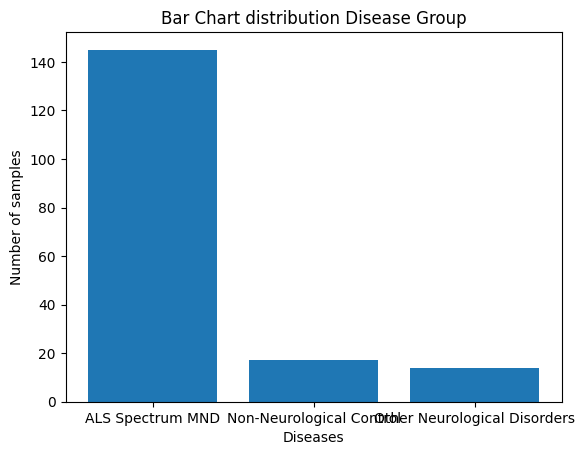

In [29]:
# Bar charts for Disease Group

plt.bar(data_by_diseasegrp.index, data_by_diseasegrp.values)

# Add titles and labels
plt.title('Bar Chart distribution Disease Group')
plt.xlabel('Diseases')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

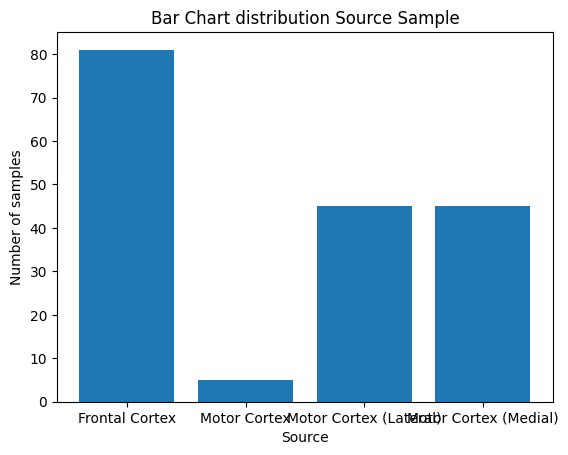

In [30]:
# Bar charts for Sources
plt.bar(data_by_subregion.index, data_by_subregion.values)

# Add titles and labels
plt.title('Bar Chart distribution Source Sample')
plt.xlabel('Source')
plt.ylabel('Number of samples')

# Show the chart
plt.show()

Histogramms for stats on the genes

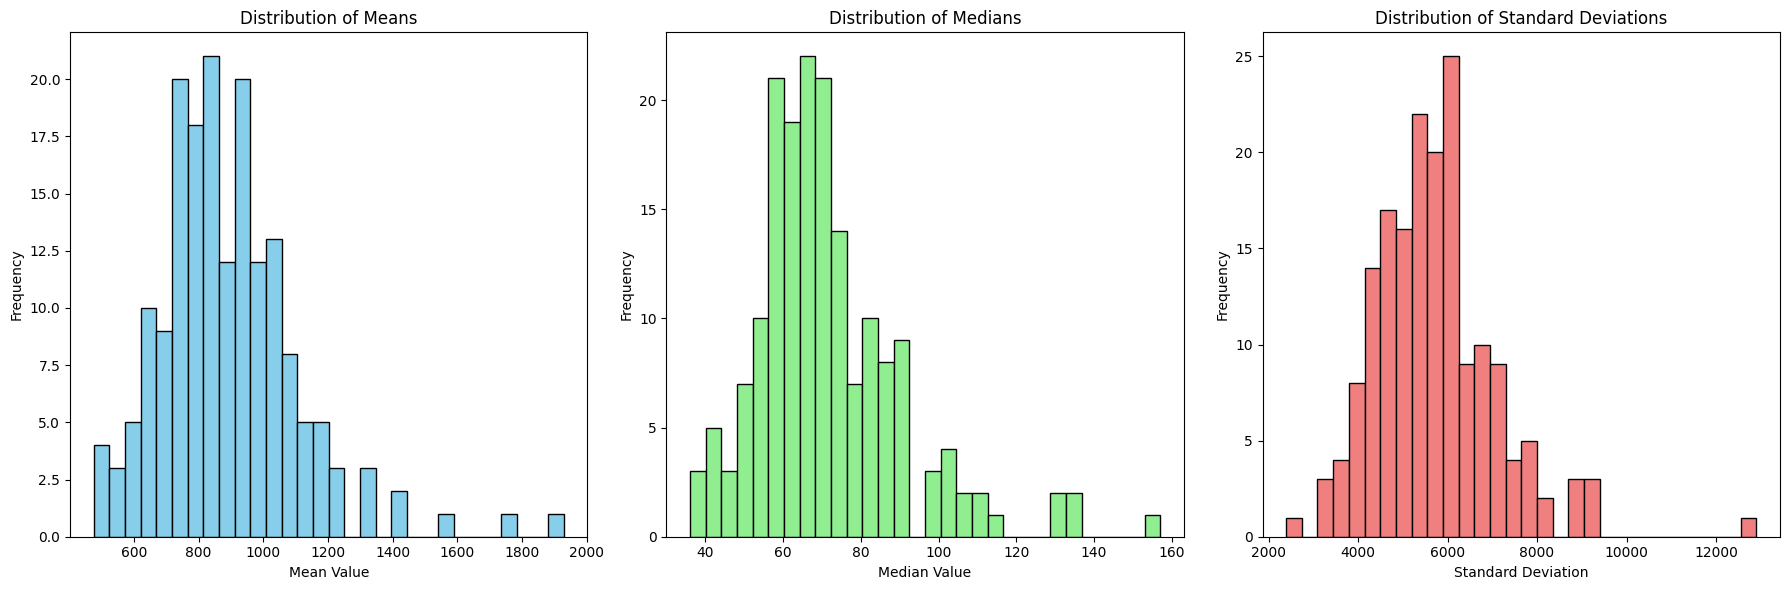

In [31]:
data = c_data.get_data_genes()


means = np.mean(data.values, axis=1)
medians = np.median(data.values, axis=1)
std_devs = np.std(data.values, axis=1)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histo means
axs[0].hist(means, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')

# Histo for medians
axs[1].hist(medians, bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Medians')
axs[1].set_xlabel('Median Value')
axs[1].set_ylabel('Frequency')

# Histo for std deviation
axs[2].hist(std_devs, bins=30, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribution of Standard Deviations')
axs[2].set_xlabel('Standard Deviation')
axs[2].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
c_data.get_data_genes()

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
Sample_id                                                                
GSM3533230    42       149     0  3327      101     78      4        0   
GSM3533231    25       107     2  1787      153    109      2        1   
GSM3533232    20        95     0  1830      121    127      1        1   
GSM3533233    22       101     0  2131      142    143      5        1   
GSM3533234    22       102     0  1706       83    178      1        3   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533401    23       113     0  2130       72     71      2        3   
GSM3533402   134       300     0  6077      171     42      8        5   
GSM3533403    64       290     0  4752      118    174      8        2   
GSM3533404   124       332     0  3516      141    173      3        2   
GSM3533405    76       193     0  4278      140    102      2        3   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                  ...                                         
GSM3533230      67      0  ...                986               2218   
GSM3533231      25      0  ...               1216               2373   
GSM3533232      11      0  ...                905               2018   
GSM3533233      36      0  ...                935               2278   
GSM3533234      31      0  ...                966               2295   
...            ...    ...  ...                ...                ...   
GSM3533401      21      0  ...                553               1243   
GSM3533402     225      0  ...                719               1988   
GSM3533403     135      0  ...                623               1466   
GSM3533404     192      0  ...                743               1846   
GSM3533405     141      0  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533401               1089                658                 72   
GSM3533402               1691                966                119   
GSM3533403               1246                726                 61   
GSM3533404               1680                936                110   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533401               320               73                     311   
GSM3533402               460              109                     399   
GSM3533403               358              107                     347   
GSM3533404               479              120                     503   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GSM3533230                    2045                   2446  
GSM3533231                    2057                   2279 

In [33]:
means = c_data.get_data_genes().mean(axis=1)
medians = c_data.get_data_genes().median(axis=1)
std_devs = c_data.get_data_genes().std(axis = 1)

sample_ids = c_data.get_data_genes().index

data = {
    'Mean': means,
    'Median':medians,
    'Std_dev': std_devs,
}

sample_stats = pd.DataFrame(data)
sample_stats


Mean  Median      Std_dev
Sample_id                                   
GSM3533230  1041.382378    92.0  7144.948717
GSM3533231   881.608503    65.0  6556.784539
GSM3533232   802.592132    58.0  5618.694081
GSM3533233   785.868615    65.0  6617.736421
GSM3533234   906.813525    61.0  6815.130467
...                 ...     ...          ...
GSM3533401   621.179187    51.0  3875.932581
GSM3533402  1412.596518   136.0  7679.231478
GSM3533403  1142.241288   101.0  5264.705168
GSM3533404  1435.251546   132.0  7032.337770
GSM3533405   932.616240    92.0  6028.364664

[176 rows x 3 columns]

In [34]:
sample_stats[sample_stats['Std_dev']==max(sample_stats['Std_dev'].values)]

Mean  Median       Std_dev
Sample_id                                    
GSM3533364  1929.230132   157.0  12904.004636

In [35]:
c_data.get_data_matrix().loc['GSM3533364']

Cns_subregion             Motor Cortex (Medial)
Sample_group                   ALS Spectrum MND
Subject_id                               JHU 83
A1BG                                         58
A1BG-AS1                                    228
                                  ...          
X8_LINE:CR1:LINE                           1180
X9_LINE:L1:LINE                             255
Zaphod2:hAT-Tip100:DNA                      954
Zaphod3:hAT-Tip100:DNA                     3946
Zaphod:hAT-Tip100:DNA                      3902
Name: GSM3533364, Length: 28956, dtype: object

In [36]:
c_data.get_data_genes().loc['GSM3533364'].idxmax(), c_data.get_data_genes().loc['GSM3533364'].max()

('MIRb:MIR:SINE', np.int64(884080))

In [37]:
c_data.get_data_genes()['MIRb:MIR:SINE'].std()

np.float64(100627.5532686476)

In [38]:
c_data.get_data_genes()['MIRb:MIR:SINE'].mean()

np.float64(366426.19886363635)

In [39]:
s_id = c_data.get_data_matrix().loc['GSM3533364']['Subject_id']
s_id

'JHU 83'

In [40]:
c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id]

Cns_subregion      Sample_group Subject_id  A1BG  \
Sample_id                                                               
GSM3533363  Motor Cortex (Lateral)  ALS Spectrum MND     JHU 83    19   
GSM3533364   Motor Cortex (Medial)  ALS Spectrum MND     JHU 83    58   
GSM3533365  Motor Cortex (Lateral)  ALS Spectrum MND     JHU 83    32   

            A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  \
Sample_id                                                ...   
GSM3533363       125     0  2264       85     93      1  ...   
GSM3533364       228     0  3953      227    260      4  ...   
GSM3533365        91     0  2537       87     84      2  ...   

            X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533363                635               1534               1372   
GSM3533364               1824               4240               3761   
GSM3533365                637               1505               1384   

            X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
Sample_id                                                            
GSM3533363                733                 98               407   
GSM3533364               2046                235              1180   
GSM3533365                724                 90               358   

            X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                                     
GSM3533363               88                     396                    1369   
GSM3533364              255                     954                    3946   
GSM3533365               65                     348                    1408   

            Zaphod:hAT-Tip100:DNA  
Sample_id                          
GSM3533363                   1486  
GSM3533364                   3902  
GSM3533365                   1409  

[3 rows x 28956 columns]

In [41]:
outlier_ids = c_data.get_data_matrix()[c_data.get_data_matrix()['Subject_id']==s_id].index.values.tolist()

In [42]:
for id in outlier_ids:
    print("id sample:",id,"mean:",c_data.get_data_genes().loc[id].mean(), "median:",c_data.get_data_genes().loc[id].median(), "std:",c_data.get_data_genes().loc[id].std())

id sample: GSM3533363 mean: 736.4009601768383 median: 60.0 std: 4855.3268535997095
id sample: GSM3533364 mean: 1929.230131592581 median: 157.0 std: 12904.004635996334
id sample: GSM3533365 mean: 754.6600006907747 median: 65.0 std: 4815.672408576015


Text(0, 0.5, 'Frequency')

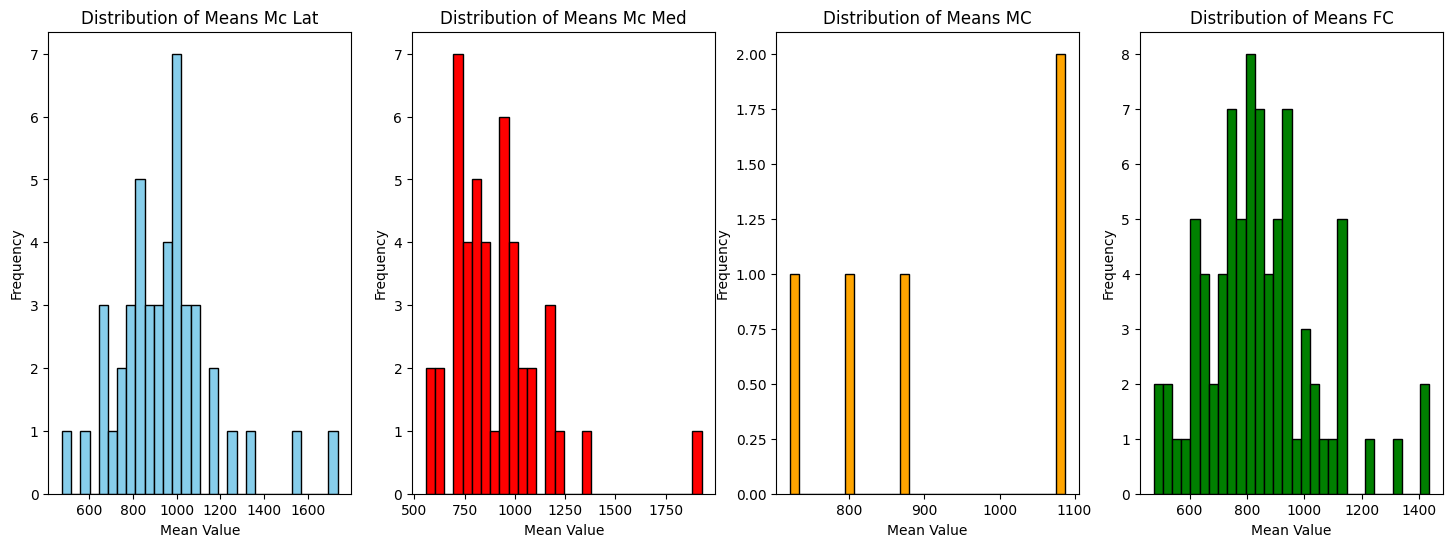

In [43]:
data = c_data.get_data_subregion_genes()
data_mc_lat = data[data['Cns_subregion'] == 'Motor Cortex (Lateral)' ]

means_mc_lat = data_mc_lat.mean(axis=1, numeric_only=True)

# ---
data = c_data.get_data_subregion_genes()
data_mc_med = data[data['Cns_subregion'] == 'Motor Cortex (Medial)' ]

means_mc_med = data_mc_med.mean(axis=1, numeric_only=True)

# ----
data = c_data.get_data_subregion_genes()
data_mc = data[data['Cns_subregion'] == 'Motor Cortex' ]

means_mc = data_mc.mean(axis=1, numeric_only=True)

# ---
data = c_data.get_data_subregion_genes()
data_fc = data[data['Cns_subregion'] == 'Frontal Cortex' ]

means_fc = data_fc.mean(axis=1, numeric_only=True)



fig, axs = plt.subplots(1, 4, figsize=(18, 6))

# Histo means
axs[0].hist(means_mc_lat, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means Mc Lat')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')


axs[1].hist(means_mc_med, bins=30, color='red', edgecolor='black')
axs[1].set_title('Distribution of Means Mc Med')
axs[1].set_xlabel('Mean Value')
axs[1].set_ylabel('Frequency')


axs[2].hist(means_mc, bins=30, color='orange', edgecolor='black')
axs[2].set_title('Distribution of Means MC')
axs[2].set_xlabel('Mean Value')
axs[2].set_ylabel('Frequency')

axs[3].hist(means_fc, bins=30, color='green', edgecolor='black')
axs[3].set_title('Distribution of Means FC')
axs[3].set_xlabel('Mean Value')
axs[3].set_ylabel('Frequency')

In [44]:
data = c_data.get_data_subregion_genes()
data
numerical_columns = data.select_dtypes(include=['number'])
data['mean'] = numerical_columns.mean(axis=1)
data

/tmp/ipykernel_2800/3742113958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean'] = numerical_columns.mean(axis=1)


Cns_subregion  A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  \
Sample_id                                                                       
GSM3533230  Frontal Cortex    42       149     0  3327      101     78      4   
GSM3533231  Frontal Cortex    25       107     2  1787      153    109      2   
GSM3533232  Frontal Cortex    20        95     0  1830      121    127      1   
GSM3533233  Frontal Cortex    22       101     0  2131      142    143      5   
GSM3533234  Frontal Cortex    22       102     0  1706       83    178      1   
...                    ...   ...       ...   ...   ...      ...    ...    ...   
GSM3533401  Frontal Cortex    23       113     0  2130       72     71      2   
GSM3533402  Frontal Cortex   134       300     0  6077      171     42      8   
GSM3533403  Frontal Cortex    64       290     0  4752      118    174      8   
GSM3533404  Frontal Cortex   124       332     0  3516      141    173      3   
GSM3533405  Frontal Cortex    76       193     0  4278      140    102      2   

            A3GALT2  A4GALT  ...  X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  \
Sample_id                    ...                                         
GSM3533230        0      67  ...               2218               2096   
GSM3533231        1      25  ...               2373               2001   
GSM3533232        1      11  ...               2018               1815   
GSM3533233        1      36  ...               2278               2032   
GSM3533234        3      31  ...               2295               1993   
...             ...     ...  ...                ...                ...   
GSM3533401        3      21  ...               1243               1089   
GSM3533402        5     225  ...               1988               1691   
GSM3533403        2     135  ...               1466               1246   
GSM3533404        2     192  ...               1846               1680   
GSM3533405        3     141  ...               1782               1432   

            X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
Sample_id                                                            
GSM3533230               1120                 84               556   
GSM3533231               1144                118               582   
GSM3533232               1011                 84               571   
GSM3533233               1198                 97               562   
GSM3533234               1152                 96               582   
...                       ...                ...               ...   
GSM3533401                658                 72               320   
GSM3533402                966                119               460   
GSM3533403                726                 61               358   
GSM3533404                936                110               479   
GSM3533405                929                 67               456   

            X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                                     
GSM3533230              134                     570                    2045   
GSM3533231              153                     552                    2057   
GSM3533232              126                     479                    1659   
GSM3533233              132                     540                    2032   
GSM3533234              124                     539                    1742   
...                     ...                     ...                     ...   
GSM3533401               73                     311                    1102   
GSM3533402              109                     399                    1619   
GSM3533403              107                     347                    1284   
GSM3533404              120                     503                    1646   
GSM3533405              104                     427                    1619   

            Zaphod:hAT-Tip100:DNA         mean  
Sample_i

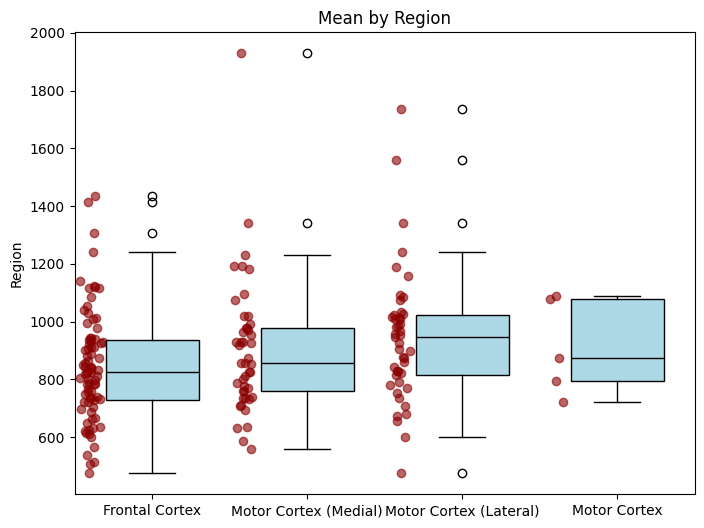

In [45]:
fig, ax = plt.subplots(figsize=(8,6))

# Extraire les données par groupe
groups = [data[data['Cns_subregion'] == region]['mean'] for region in data['Cns_subregion'].unique()]

# Tracer le box plot
box = ax.boxplot(groups, patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate(groups, 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(data['Cns_subregion'].unique())
ax.set_ylabel('Region')
ax.set_title('Mean by Region')

# Affichage
plt.show()

In [46]:
def find_outliers(df, column, groupby_col=None):
    if groupby_col!=None:
        outliers = []
        for region, group in df.groupby(groupby_col):
            Q1 = group[column].quantile(0.25)
            Q3 = group[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outlier_values = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
            outliers.append(outlier_values)
        
        return pd.concat(outliers)
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers for the entire dataset
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers

In [47]:
outliers_df = find_outliers(data, 'mean', 'Cns_subregion')
outliers_df

Cns_subregion  A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  \
Sample_id                                                                 
GSM3533343          Frontal Cortex    56       219     6  4688      150   
GSM3533402          Frontal Cortex   134       300     0  6077      171   
GSM3533404          Frontal Cortex   124       332     0  3516      141   
GSM3533276  Motor Cortex (Lateral)    78       120     0  6849      158   
GSM3533302  Motor Cortex (Lateral)    63       292     2  4053      207   
GSM3533307  Motor Cortex (Lateral)    18        69     0   946       55   
GSM3533361  Motor Cortex (Lateral)    92       341     0  2660      163   
GSM3533293   Motor Cortex (Medial)    38       166     0  5970      190   
GSM3533364   Motor Cortex (Medial)    58       228     0  3953      227   

            A2ML1  A2MP1  A3GALT2  A4GALT  ...  X7A_LINE:CR1:LINE  \
Sample_id                                  ...                      
GSM3533343    129      2        4      40  ...               2134   
GSM3533402     42      8        5     225  ...               1988   
GSM3533404    173      3        2     192  ...               1846   
GSM3533276     76      5        1      57  ...               2064   
GSM3533302    293      5        4      42  ...               2959   
GSM3533307     74      0        4       4  ...               1401   
GSM3533361    288      0       11      78  ...               2785   
GSM3533293    153      0        0     129  ...               1951   
GSM3533364    260      4        5      83  ...               4240   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533343               1901               1023                 84   
GSM3533402               1691                966                119   
GSM3533404               1680                936                110   
GSM3533276               1979                948                131   
GSM3533302               2836               1516                152   
GSM3533307               1148                703                 56   
GSM3533361               2520               1308                123   
GSM3533293               1968                976                101   
GSM3533364               3761               2046                235   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533343               533              132                     563   
GSM3533402               460              109                     399   
GSM3533404               479              120                     503   
GSM3533276               446              100                     464   
GSM3533302               725              206                     754   
GSM3533307               410               81                     334   
GSM3533361               632              163                     655   
GSM3533293               466              129                     549   
GSM3533364              1180              255                     954   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA         mean  
Sample_id                                                               
GSM3533343                    1751                   2131  1308.257210  
GSM3533402                    1619                   1724  1412.596518  
GSM3533404                    1646                   1839  1435.251546  
GSM3533276                    1776                   2084  1340.550547  
GSM3533302                    2652                   3049  1736.451145  
GSM3533307                    1213                   1210   476.158326  
GSM3533361                    2479                   2930  1560.718302  
GSM3533293                    1618                   2049  1342.107726  
GSM3533364                    3946                   3902  1929.230132  

[9 rows x 28955 columns]

In [48]:
data_norm = (c_data.get_data_genes() - c_data.get_data_genes().mean()) / c_data.get_data_genes().std()
data_norm.drop(outliers_df.index.values.tolist(), inplace=True)

In [49]:
outlier_ids
datas = c_data.get_data_genes()
datas.drop(outliers_df.index.values.tolist(), inplace=True)
datas

/tmp/ipykernel_2800/2398580056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas.drop(outliers_df.index.values.tolist(), inplace=True)


A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
Sample_id                                                                
GSM3533230    42       149     0  3327      101     78      4        0   
GSM3533231    25       107     2  1787      153    109      2        1   
GSM3533232    20        95     0  1830      121    127      1        1   
GSM3533233    22       101     0  2131      142    143      5        1   
GSM3533234    22       102     0  1706       83    178      1        3   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533399    46       179     0  2899       89    109      1        6   
GSM3533400    37       182     0  1509       76     76      4        0   
GSM3533401    23       113     0  2130       72     71      2        3   
GSM3533403    64       290     0  4752      118    174      8        2   
GSM3533405    76       193     0  4278      140    102      2        3   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                  ...                                         
GSM3533230      67      0  ...                986               2218   
GSM3533231      25      0  ...               1216               2373   
GSM3533232      11      0  ...                905               2018   
GSM3533233      36      0  ...                935               2278   
GSM3533234      31      0  ...                966               2295   
...            ...    ...  ...                ...                ...   
GSM3533399      46      1  ...                796               1694   
GSM3533400      28      2  ...                520               1324   
GSM3533401      21      0  ...                553               1243   
GSM3533403     135      0  ...                623               1466   
GSM3533405     141      0  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533399               1488                869                 89   
GSM3533400               1146                676                 42   
GSM3533401               1089                658                 72   
GSM3533403               1246                726                 61   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533399               469               99                     442   
GSM3533400               364               67                     298   
GSM3533401               320               73                     311   
GSM3533403               358              107                     347   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GSM3533230                    2045                   2446  
GSM3533231                    2057                   2279 

### Genes

In [50]:
'''fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(data_norm, cmap='viridis', aspect='auto')

# Add color bar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(list_genes)))
ax.set_yticks(np.arange(len(data_norm.index.values.tolist())))
ax.set_xticklabels(list_genes, rotation=90, fontsize=8)  # Rotate gene labels
ax.set_yticklabels(data_norm.index.values.tolist(), fontsize=8)

# Labels
ax.set_xlabel('Genes')
ax.set_ylabel('Samples')
ax.set_title('Gene Expression Heatmap')

# Show the heatmap
plt.show()'''

"fig, ax = plt.subplots(figsize=(10, 6))\ncax = ax.imshow(data_norm, cmap='viridis', aspect='auto')\n\n# Add color bar\nfig.colorbar(cax)\n\n# Set ticks and labels\nax.set_xticks(np.arange(len(list_genes)))\nax.set_yticks(np.arange(len(data_norm.index.values.tolist())))\nax.set_xticklabels(list_genes, rotation=90, fontsize=8)  # Rotate gene labels\nax.set_yticklabels(data_norm.index.values.tolist(), fontsize=8)\n\n# Labels\nax.set_xlabel('Genes')\nax.set_ylabel('Samples')\nax.set_title('Gene Expression Heatmap')\n\n# Show the heatmap\nplt.show()"

In [51]:
data_by_diseasegrp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [52]:
c_data.get_data_matrix()

Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
Sample_id                                                                   
GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
...                    ...               ...          ...   ...       ...   
GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

            A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  X6B_LINE:CR1:LINE  \
Sample_id                                      ...                      
GSM3533230     0  3327      101     78      4  ...                986   
GSM3533231     2  1787      153    109      2  ...               1216   
GSM3533232     0  1830      121    127      1  ...                905   
GSM3533233     0  2131      142    143      5  ...                935   
GSM3533234     0  1706       83    178      1  ...                966   
...          ...   ...      ...    ...    ...  ...                ...   
GSM3533401     0  2130       72     71      2  ...                553   
GSM3533402     0  6077      171     42      8  ...                719   
GSM3533403     0  4752      118    174      8  ...                623   
GSM3533404     0  3516      141    173      3  ...                743   
GSM3533405     0  4278      140    102      2  ...                695   

            X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2218               2096               1120   
GSM3533231               2373               2001               1144   
GSM3533232               2018               1815               1011   
GSM3533233               2278               2032               1198   
GSM3533234               2295               1993               1152   
...                       ...                ...                ...   
GSM3533401               1243               1089                658   
GSM3533402               1988               1691                966   
GSM3533403               1466               1246                726   
GSM3533404               1846               1680                936   
GSM3533405               1782               1432                929   

            X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  X9_LINE:L1:LINE  \
Sample_id                                                          
GSM3533230                 84               556              134   
GSM3533231                118               582              153   
GSM3533232                 84               571              126   
GSM3533233                 97               562              132   
GSM3533234                 96               582              124   
...                       ...               ...              ...   
GSM3533401                 72               320               73   
GSM3533402                119               460              109   
GSM3533403                 61               358              107   
GSM3533404                110               479              120   
GSM3533405                 67               456              104   

            Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                    
GSM3533230                     570                    2045   
GSM3533231                     552                    2057   
GSM3

In [53]:
len(list_genes)
len(c_data.get_data_matrix().columns)

28956

#### Genes stats Lenora

In [54]:
df = c_data.get_data_genes_normalized()
gene_stats = pd.DataFrame({
    'Mean': df.mean(axis=0),
    'Median': df.median(axis=0),
    'Std': df.std(axis=0)
})


In [55]:
gene_stats 

Mean    Median  Std
A1BG                    5.046468e-18 -0.198062  1.0
A1BG-AS1                1.009294e-16 -0.209153  1.0
A1CF                    2.523234e-17 -0.257160  1.0
A2M                     5.046468e-17 -0.132126  1.0
A2M-AS1                 1.381471e-16 -0.226928  1.0
...                              ...       ...  ...
X8_LINE:CR1:LINE        1.513940e-16 -0.113419  1.0
X9_LINE:L1:LINE         1.009294e-16 -0.114998  1.0
Zaphod2:hAT-Tip100:DNA -3.027881e-17 -0.052556  1.0
Zaphod3:hAT-Tip100:DNA  1.362546e-16  0.014853  1.0
Zaphod:hAT-Tip100:DNA  -1.312082e-16 -0.005208  1.0

[28953 rows x 3 columns]

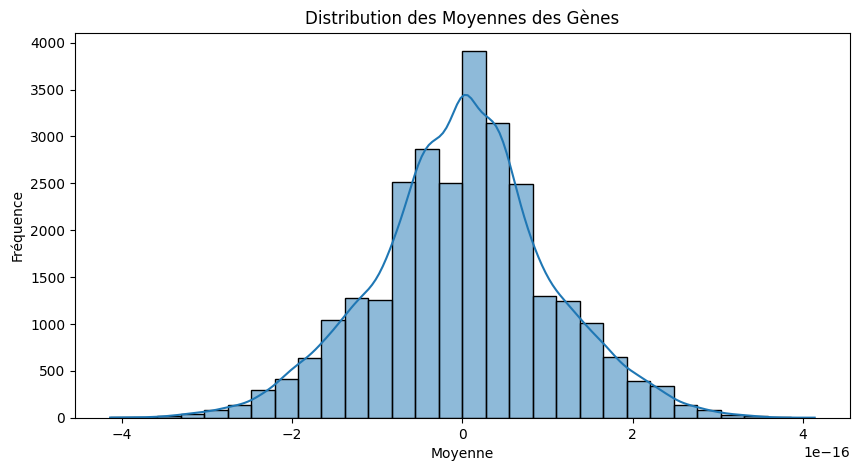

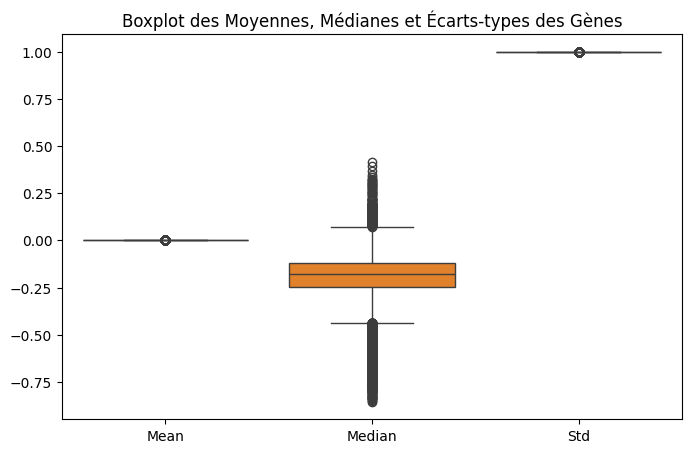

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme des moyennes
plt.figure(figsize=(10,5))
sns.histplot(gene_stats['Mean'], bins=30, kde=True)
plt.title("Distribution des Moyennes des Gènes")
plt.xlabel("Moyenne")
plt.ylabel("Fréquence")
plt.show()

# Boxplot des valeurs
plt.figure(figsize=(8,5))
sns.boxplot(data=gene_stats)
plt.title("Boxplot des Moyennes, Médianes et Écarts-types des Gènes")
plt.show()


We can see that most of the genes have a mean between 0 and 50000, a few are between 50k and 150k. Some outsiders are also present.

In [57]:
# Display most variable genes
gene_stats_sorted = gene_stats.sort_values(by="Std", ascending=False)
print(gene_stats_sorted.head(10))  # Top 10 most variable genes

                   Mean    Median  Std
OR4C11    -1.009294e-17 -0.131311  1.0
HMX2       2.523234e-17 -0.089965  1.0
HAVCR1P1  -5.046468e-18 -0.131311  1.0
PPY2P     -5.046468e-18 -0.131311  1.0
MPZ       -1.009294e-17 -0.125050  1.0
CNTN4-AS2  1.009294e-17 -0.170510  1.0
SLC5A10    0.000000e+00 -0.131311  1.0
DMBX1     -2.018587e-17 -0.095629  1.0
CCR8       5.046468e-18 -0.131311  1.0
ANXA10    -1.261617e-17 -0.170510  1.0


Separation des echantillons entre malades et pas malades

In [58]:
df_als = c_data.get_data_als()
df_control = c_data.get_data_control()

In [59]:
# Compute descriptive statistics for ALS and Control separately
als_stats = df_als.describe().T
control_stats = df_control.describe().T

# Add a column to show difference in mean expression
als_stats["Control_Mean"] = control_stats["mean"]
als_stats["Diff_Mean"] = als_stats["mean"] - als_stats["Control_Mean"]

# Show top differentially expressed genes
als_stats_sorted = als_stats.sort_values(by="Diff_Mean", ascending=False)
print(als_stats_sorted.head(10))  # Genes with largest mean difference

als_stats

                       count          mean  std       min       25%       50%  \
ZNF587                 145.0  4.042743e-16  1.0 -2.024881 -0.655837 -0.181523   
TRMT11                 145.0  4.165251e-16  1.0 -2.029821 -0.668793 -0.119018   
HIPK1                  145.0  3.185192e-16  1.0 -2.402783 -0.681850 -0.099909   
AADAT                  145.0  3.062684e-16  1.0 -1.777542 -0.564104 -0.128209   
THUMPD2                145.0  3.430206e-16  1.0 -2.099663 -0.618607 -0.171939   
ZNF221                 145.0  3.047371e-16  1.0 -2.222125 -0.673048 -0.188961   
GUF1                   145.0  2.878923e-16  1.0 -2.121054 -0.639850 -0.140945   
ZNF141                 145.0  2.940177e-16  1.0 -2.141103 -0.619804 -0.080943   
MER45C:hAT-Tip100:DNA  145.0  3.491460e-16  1.0 -2.323954 -0.647829 -0.113174   
RNPC3                  145.0  3.430206e-16  1.0 -2.390925 -0.687332 -0.124594   

                            75%       max  Control_Mean     Diff_Mean  
ZNF587                 0.447303  5.0

count          mean  std       min       25%  \
A1BG                    145.0  9.800589e-17  1.0 -1.364181 -0.625731   
A1BG-AS1                145.0 -2.450147e-17  1.0 -1.564294 -0.591224   
A1CF                    145.0 -2.143879e-17  1.0 -0.276759 -0.276759   
A2M                     145.0 -1.653849e-16  1.0 -1.530455 -0.777904   
A2M-AS1                 145.0 -6.125368e-18  1.0 -1.940680 -0.656265   
...                       ...           ...  ...       ...       ...   
X8_LINE:CR1:LINE        145.0  1.592596e-16  1.0 -2.150268 -0.617218   
X9_LINE:L1:LINE         145.0  1.286327e-16  1.0 -1.971840 -0.705921   
Zaphod2:hAT-Tip100:DNA  145.0  8.575516e-17  1.0 -2.211017 -0.697433   
Zaphod3:hAT-Tip100:DNA  145.0  0.000000e+00  1.0 -1.972257 -0.673467   
Zaphod:hAT-Tip100:DNA   145.0  7.350442e-17  1.0 -2.013453 -0.651081   

                             50%       75%       max  Control_Mean  \
A1BG                   -0.231890  0.260410  4.740343 -7.879002e-17   
A1BG-AS1               -0.201996  0.420769  4.313048 -2.435328e-16   
A1CF                   -0.276759 -0.276759  8.026022  2.148819e-17   
A2M                    -0.197983  0.597913  3.475095 -1.611614e-17   
A2M-AS1                -0.237434  0.488540  3.448279  1.593707e-16   
...                          ...       ...       ...           ...   
X8_LINE:CR1:LINE       -0.113828  0.496341  5.484474  1.486266e-16   
X9_LINE:L1:LINE        -0.133244  0.590139  4.327613 -1.719055e-16   
Zaphod2:hAT-Tip100:DNA -0.022986  0.525982  4.204070  1.486266e-16   
Zaphod3:hAT-Tip100:DNA -0.029317  0.486842  5.018970 -2.553961e-16   
Zaphod:hAT-Tip100:DNA  -0.009615  0.494820  4.299927  8.237139e-17   

                           Diff_Mean  
A1BG                    1.767959e-16  
A1BG-AS1                2.190313e-16  
A1CF                   -4.292698e-17  
A2M                    -1.492688e-16  
A2M-AS1                -1.654961e-16  
...                              ...  
X8_LINE:CR1:LINE        1.063295e-17  
X9_LINE:L1:LINE         3.005382e-16  
Zaphod2:hAT-Tip100:DNA -6.287147e-17  
Zaphod3:hAT-Tip100:DNA  2.553961e-16  
Zaphod:hAT-Tip100:DNA  -8.866965e-18  

[28953 rows x 10 columns]

/tmp/ipykernel_2800/1166647700.py:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(data=[als_stats["mean"], control_stats["mean"]], palette=["red", "blue"])


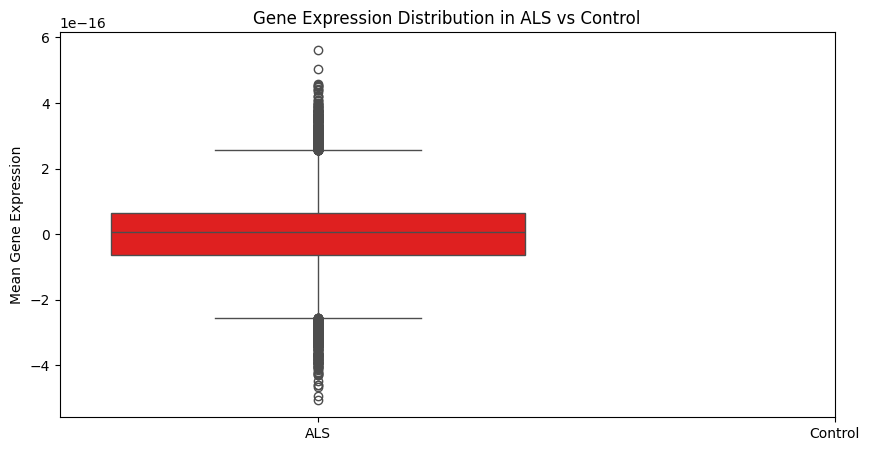

In [60]:
plt.figure(figsize=(10,5))
sns.boxplot(data=[als_stats["mean"], control_stats["mean"]], palette=["red", "blue"])
plt.xticks([0,1], ["ALS", "Control"])
plt.title("Gene Expression Distribution in ALS vs Control")
plt.ylabel("Mean Gene Expression")
plt.show()


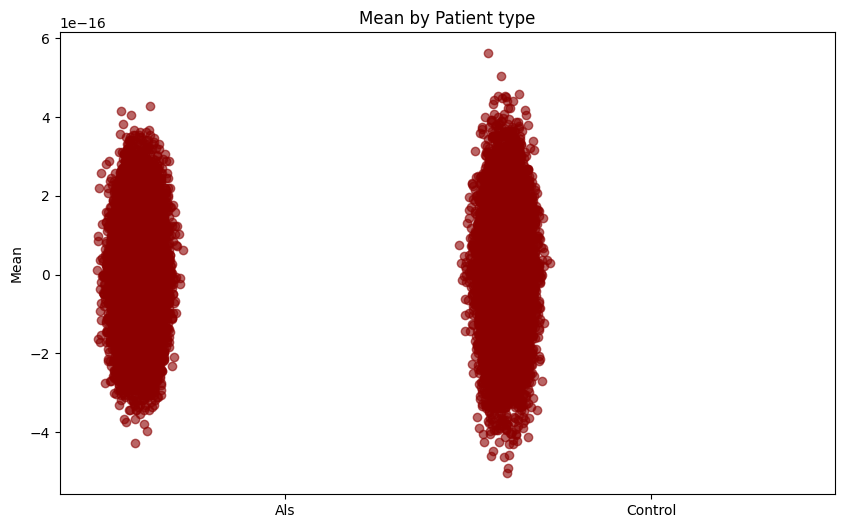

In [61]:
fig, ax = plt.subplots(figsize=(10,6))

# Tracer le box plot
box = ax.boxplot([als_stats['mean'], control_stats['mean']], patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate([als_stats['mean'], control_stats['mean']], 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2])
ax.set_xticklabels(["Als", "Control"])
ax.set_ylabel('Mean')
ax.set_title('Mean by Patient type')

# Affichage
plt.show()

In [62]:
mean_als_outliers = find_outliers(als_stats, "mean")
mean_control_outliers = find_outliers(control_stats, "mean")

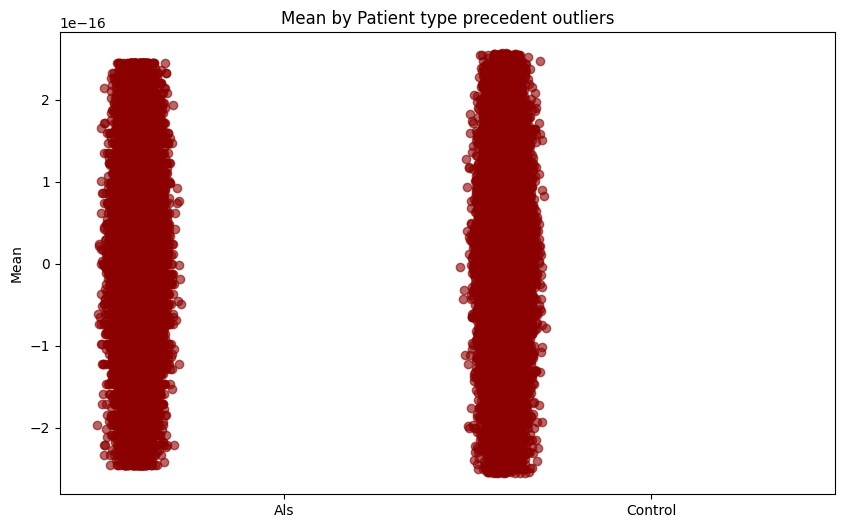

In [63]:
als_stats_no_outliers = als_stats.drop(mean_als_outliers.index)
control_stats_no_outliers = control_stats.drop(mean_control_outliers.index)

fig, ax = plt.subplots(figsize=(10,6))

# Tracer le box plot
box = ax.boxplot([als_stats_no_outliers['mean'], control_stats_no_outliers['mean']], patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate([als_stats_no_outliers['mean'], control_stats_no_outliers['mean']], 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2])
ax.set_xticklabels(["Als", "Control"])
ax.set_ylabel('Mean')
ax.set_title('Mean by Patient type precedent outliers')

# Affichage
plt.show()

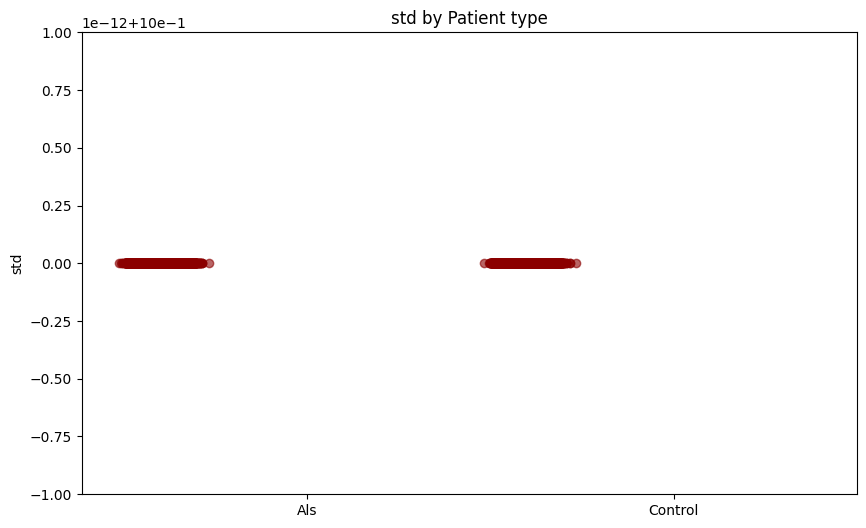

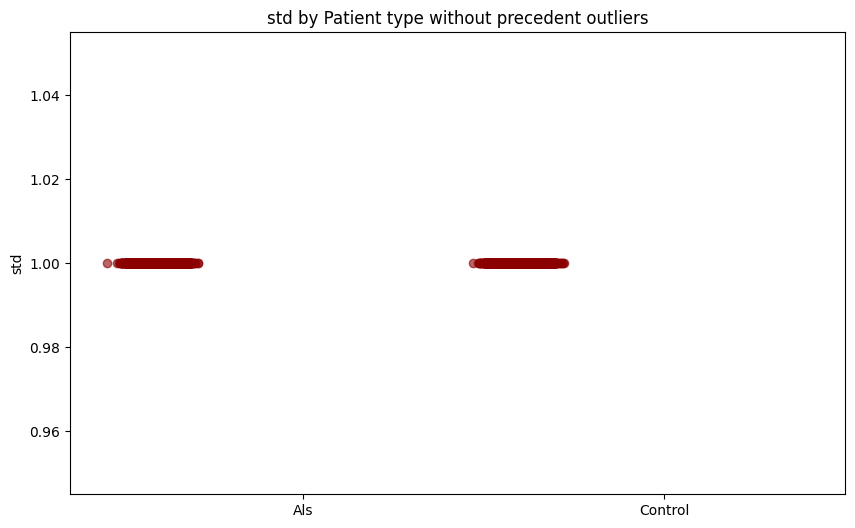

In [64]:
std_als_outliers = find_outliers(als_stats, "std")
std_control_outliers = find_outliers(control_stats, "std")

fig, ax = plt.subplots(figsize=(10,6))

# Tracer le box plot
box = ax.boxplot([als_stats['std'], control_stats['std']], patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate([als_stats['std'], control_stats['std']], 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2])
ax.set_xticklabels(["Als", "Control"])
ax.set_ylabel('std')
ax.set_title('std by Patient type')


als_stats_no_outliers = als_stats.drop(std_als_outliers.index)
control_stats_no_outliers = control_stats.drop(std_control_outliers.index)

fig, ax = plt.subplots(figsize=(10,6))

# Tracer le box plot
box = ax.boxplot([als_stats_no_outliers['std'], control_stats_no_outliers['std']], patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate([als_stats_no_outliers['std'], control_stats_no_outliers['std']], 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2])
ax.set_xticklabels(["Als", "Control"])
ax.set_ylabel('std')
ax.set_title('std by Patient type without precedent outliers')

# Affichage
plt.show()

Clairement y a un problème

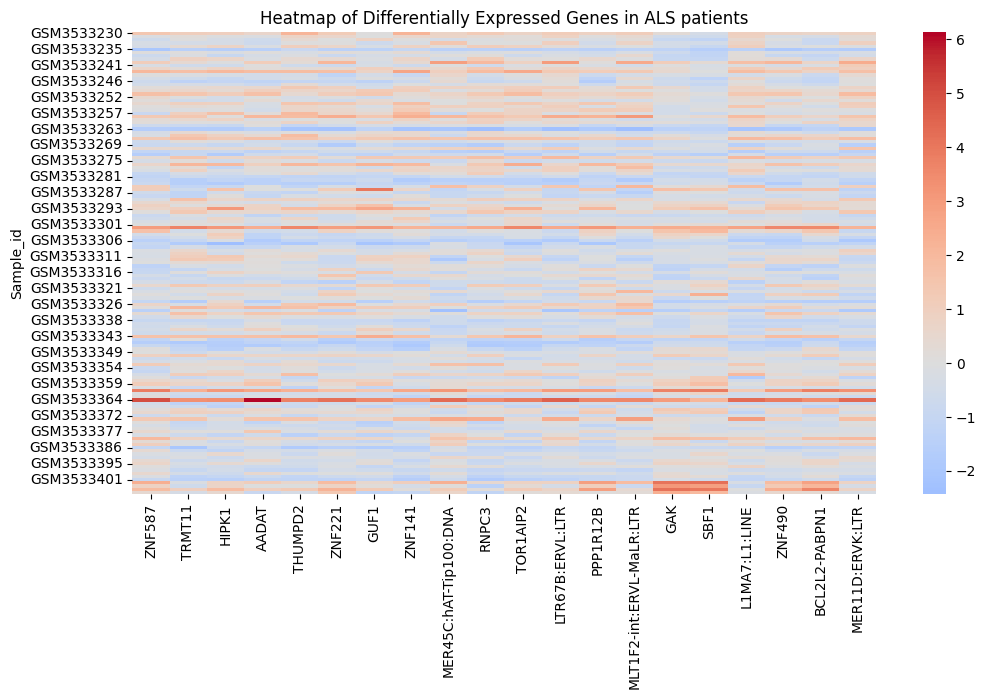

In [65]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_als()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes in ALS patients")
plt.show()


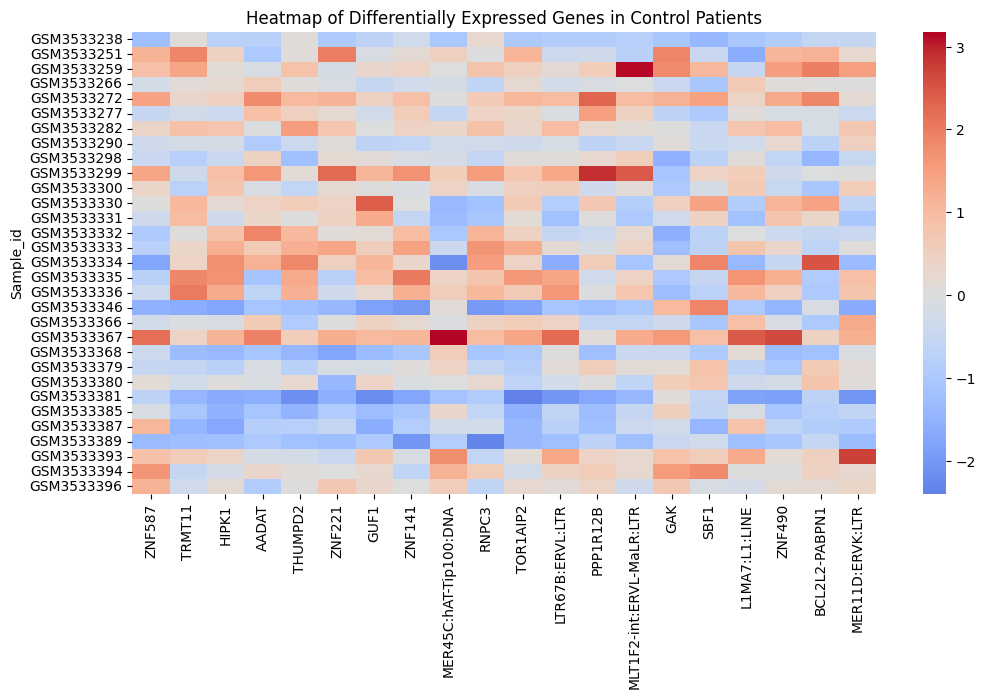

In [66]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_control()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes in Control Patients")
plt.show()

##### Data transformation

In [67]:
df = c_data.get_data_genes_normalized()
df_log = np.log2(df + 1)

/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)


In [68]:
df_als_log = np.log2(df_als + 1)

In [69]:
df_control_log = np.log2(df_control + 1)

Text(0.5, 1.0, 'Log-Transformed Genes Distribution')

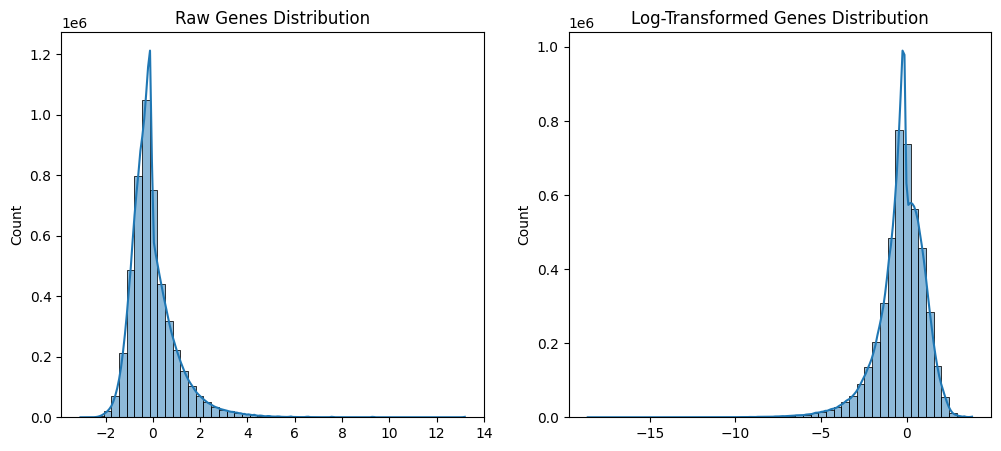

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df.values.flatten(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Raw Genes Distribution")

sns.histplot(df_log.values.flatten(), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Genes Distribution")

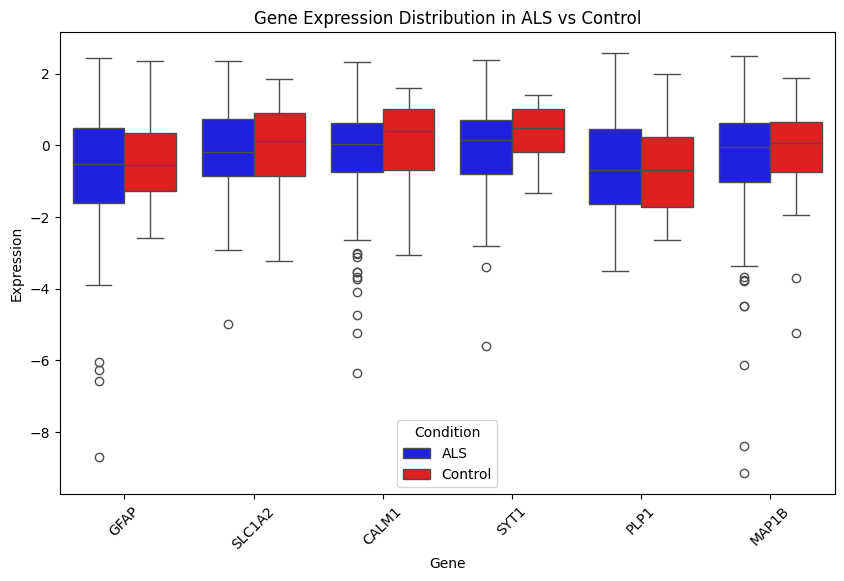

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selection of a few genes for visualization
selected_genes = ["GFAP", "SLC1A2", "CALM1", "SYT1", "PLP1", "MAP1B"]  # Replace with actual gene names

df_als_log["Condition"] = "ALS"
df_control_log["Condition"] = "Control"

df_combined = pd.concat([df_als_log, df_control_log])

# Convert data to long format for seaborn
df_long = df_combined.melt(id_vars=["Condition"], value_vars=selected_genes, var_name="Gene", value_name="Expression")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Gene", y="Expression", hue="Condition", data=df_long, palette=["blue", "red"])
plt.title("Gene Expression Distribution in ALS vs Control")
plt.xticks(rotation=45)
plt.show()


On peut pas vraiment voir de grosse differences entre control et als là ?

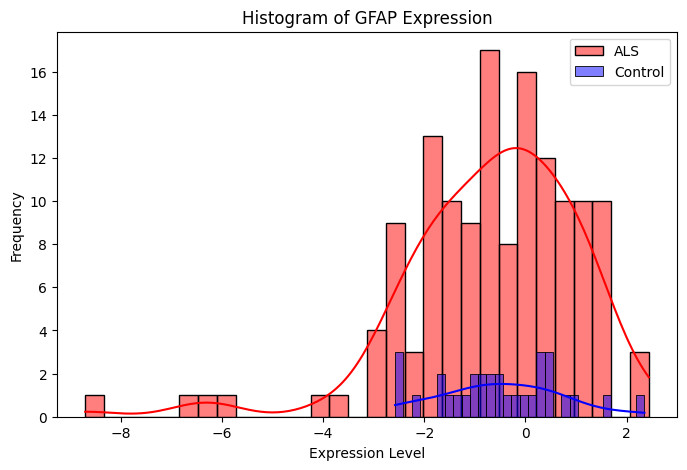

In [72]:
gene_of_interest = "GFAP"  # Replace with actual gene name

plt.figure(figsize=(8, 5))
sns.histplot(df_als_log[gene_of_interest], color="red", label="ALS", kde=True, bins=30)
sns.histplot(df_control_log[gene_of_interest], color="blue", label="Control", kde=True, bins=30)
plt.title(f"Histogram of {gene_of_interest} Expression")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

On voit une vraie diff entre control et als là pour le coup

/home/lenora/miniconda3/envs/pydeseq2/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log2
  result = func(self.values, **kwargs)
/tmp/ipykernel_2800/3117973073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log)
/tmp/ipykernel_2800/3117973073.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)


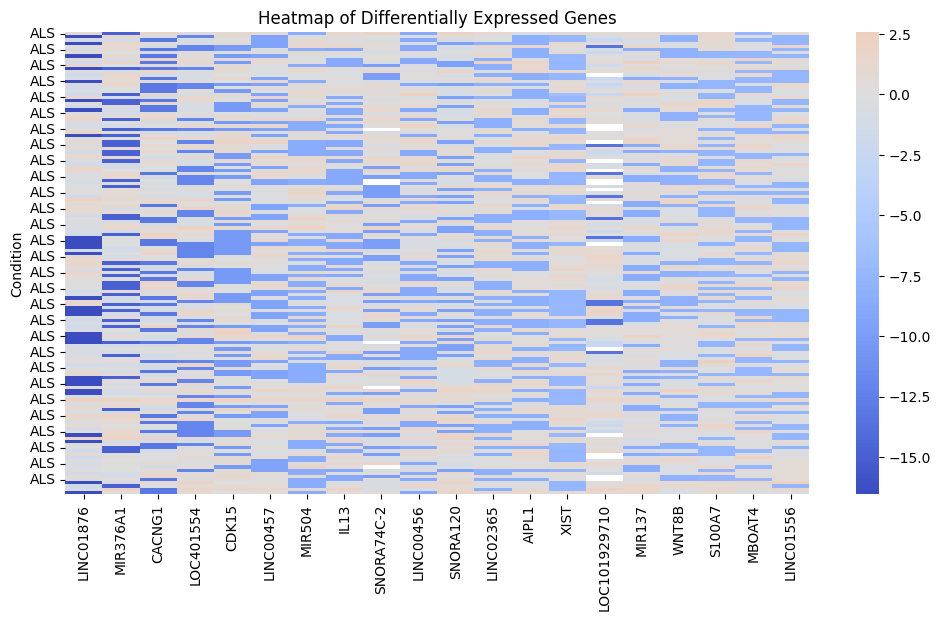

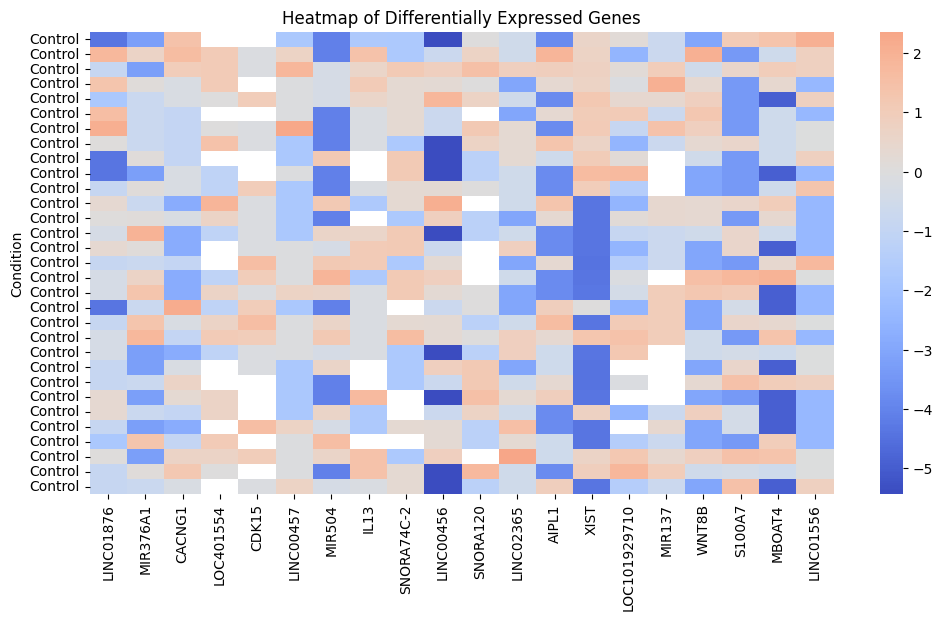

In [73]:
df_als_log = np.log2(df_als + 1)
df_control_log = np.log2(df_control + 1)
# Compute the standard deviation for each gene
std_als = df_als_log.std()
std_control = df_control_log.std()

# Select the top 20 most variable genes
top_variable_genes = std_als.nlargest(20).index  # Get top 20 variable genes in ALS

# Combine ALS and Control data for selected genes
df_heatmap_als = df_als_log[top_variable_genes]
df_heatmap_control = df_control_log[top_variable_genes]

# Add condition labels
df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log) 
df_heatmap_als = df_heatmap_als.set_index("Condition")

df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)
df_heatmap_control = df_heatmap_control.set_index("Condition")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_als, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()


plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_control, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()

Truc chelou avec XIST, à regarder plus precisement

In [74]:
def heatmap_comparison(set_of_genes, df1, df2):
    # Extract relevant genes
    df1_subset = df1[set_of_genes]  
    df2_subset = df2[set_of_genes]

    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot ALS heatmap
    sns.heatmap(df1_subset, cmap="coolwarm", center=0, ax=axes[0])
    axes[0].set_title("ALS Patients")

    # Plot Control heatmap
    sns.heatmap(df2_subset, cmap="coolwarm", center=0, ax=axes[1])
    axes[1].set_title("Control Patients")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [75]:
for i in tqdm(range(0, len(als_stats), 20)) :
    subset_genes = als_stats.iloc[i:i+20].index
    #heatmap_comparison(subset_genes, c_data.get_data_als(), c_data.get_data_control())

100%|██████████| 1448/1448 [00:00<00:00, 22990.49it/s]


# Step 3

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
my_data = c_data.get_data_genes_normalized()
my_data = my_data.loc[:, my_data.var() > 0]
X = scaler.fit_transform(my_data) # my_data being your dataframe containing your genes in column and samples in row

In [77]:
X

array([[ 0.19251575,  0.63398434, -0.25789342, ...,  1.2625332 ,
         1.06112223,  1.45131029],
       [-0.63866337, -0.24099928,  2.76805603, ...,  1.11502969,
         1.08714238,  1.1101587 ],
       [-0.88312782, -0.4909946 , -0.25789342, ...,  0.51682101,
         0.22414049,  0.08670394],
       ...,
       [ 1.26815933,  3.57142936, -0.25789342, ..., -0.5648714 ,
        -0.58898943, -0.54452863],
       [ 4.20173273,  4.44641298, -0.25789342, ...,  0.71349236,
         0.19595199,  0.2113162 ],
       [ 1.85487401,  1.55063385, -0.25789342, ...,  0.09069976,
         0.13740664,  0.0315477 ]], shape=(176, 27794))

In [78]:
components = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]

In [79]:
pca = PCA(n_components=10)  # Reduce to 10 principal components
principal_components = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=components, index=my_data.index)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.30097067 0.08687648 0.07840726 0.04863404 0.02981296 0.02514091
 0.0195235  0.01727648 0.0123537  0.0098658 ]


In [80]:
df_pca

PC1        PC2         PC3        PC4        PC5  \
Sample_id                                                             
GSM3533230   63.338217 -13.651998   13.371173  57.694199  70.495524   
GSM3533231  -27.705410   1.065093  -14.548488  42.500498 -15.111797   
GSM3533232  -54.598212  15.515728  -34.567249  30.406931  -8.968636   
GSM3533233  -60.568733 -14.416886   30.345590  53.151664 -10.737426   
GSM3533234  -19.600163 -21.833298  -44.672109  62.305530   2.121300   
...                ...        ...         ...        ...        ...   
GSM3533401 -101.283312 -28.015676    7.741880 -39.156878 -13.153557   
GSM3533402  250.168987  33.405625  166.157513 -85.932250 -32.708450   
GSM3533403  147.743104 -69.120344   44.748210 -93.538686 -35.579856   
GSM3533404  273.361919 -48.820609   88.271117 -91.358294 -36.977489   
GSM3533405   46.944249 -27.544630  104.970606 -12.894761 -18.349821   

                  PC6        PC7        PC8        PC9       PC10  
Sample_id                                                          
GSM3533230  -2.019392 -77.296808   9.500198  -7.283289  -2.687556  
GSM3533231  -4.363116   3.992020 -18.079045 -22.125898  -1.721468  
GSM3533232   2.948019   6.631957  -9.827973 -23.346582  -2.930160  
GSM3533233  30.036607   8.739795  -5.050794 -16.204506  -5.442642  
GSM3533234  55.041907  -6.456743  -7.343903 -25.431543 -14.965551  
...               ...        ...        ...        ...        ...  
GSM3533401  -7.630520  -1.315830  -6.941014 -15.058781   2.501013  
GSM3533402  58.361202 -65.366235  -9.017789 -26.906562  -4.743025  
GSM3533403  18.861386  -6.676369  49.737110 -24.135843  -2.975417  
GSM3533404  16.739178 -12.663501  40.114302  -6.423805 -21.467993  
GSM3533405  71.495844 -23.593559  33.372682  29.224157   6.701214  

[176 rows x 10 columns]

In [81]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_labels.unique()

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

In [82]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_pca = df_pca.merge(df_labels, left_index=True, right_index=True)
df_pca

PC1        PC2         PC3        PC4        PC5  \
Sample_id                                                             
GSM3533230   63.338217 -13.651998   13.371173  57.694199  70.495524   
GSM3533231  -27.705410   1.065093  -14.548488  42.500498 -15.111797   
GSM3533232  -54.598212  15.515728  -34.567249  30.406931  -8.968636   
GSM3533233  -60.568733 -14.416886   30.345590  53.151664 -10.737426   
GSM3533234  -19.600163 -21.833298  -44.672109  62.305530   2.121300   
...                ...        ...         ...        ...        ...   
GSM3533401 -101.283312 -28.015676    7.741880 -39.156878 -13.153557   
GSM3533402  250.168987  33.405625  166.157513 -85.932250 -32.708450   
GSM3533403  147.743104 -69.120344   44.748210 -93.538686 -35.579856   
GSM3533404  273.361919 -48.820609   88.271117 -91.358294 -36.977489   
GSM3533405   46.944249 -27.544630  104.970606 -12.894761 -18.349821   

                  PC6        PC7        PC8        PC9       PC10  \
Sample_id                                                           
GSM3533230  -2.019392 -77.296808   9.500198  -7.283289  -2.687556   
GSM3533231  -4.363116   3.992020 -18.079045 -22.125898  -1.721468   
GSM3533232   2.948019   6.631957  -9.827973 -23.346582  -2.930160   
GSM3533233  30.036607   8.739795  -5.050794 -16.204506  -5.442642   
GSM3533234  55.041907  -6.456743  -7.343903 -25.431543 -14.965551   
...               ...        ...        ...        ...        ...   
GSM3533401  -7.630520  -1.315830  -6.941014 -15.058781   2.501013   
GSM3533402  58.361202 -65.366235  -9.017789 -26.906562  -4.743025   
GSM3533403  18.861386  -6.676369  49.737110 -24.135843  -2.975417   
GSM3533404  16.739178 -12.663501  40.114302  -6.423805 -21.467993   
GSM3533405  71.495844 -23.593559  33.372682  29.224157   6.701214   

                Sample_group  
Sample_id                     
GSM3533230  ALS Spectrum MND  
GSM3533231  ALS Spectrum MND  
GSM3533232  ALS Spectrum MND  
GSM3533233  ALS Spectrum MND  
GSM3533234  ALS Spectrum MND  
...                      ...  
GSM3533401  ALS Spectrum MND  
GSM3533402  ALS Spectrum MND  
GSM3533403  ALS Spectrum MND  
GSM3533404  ALS Spectrum MND  
GSM3533405  ALS Spectrum MND  

[176 rows x 11 columns]

In [83]:


# Define color mapping for categories
color_map = {"ALS Spectrum MND": "red", "Non-Neurological Control": "blue", 'Other Neurological Disorders' : 'yellow'}
df_pca["Color"] = df_pca["Sample_group"].map(color_map)


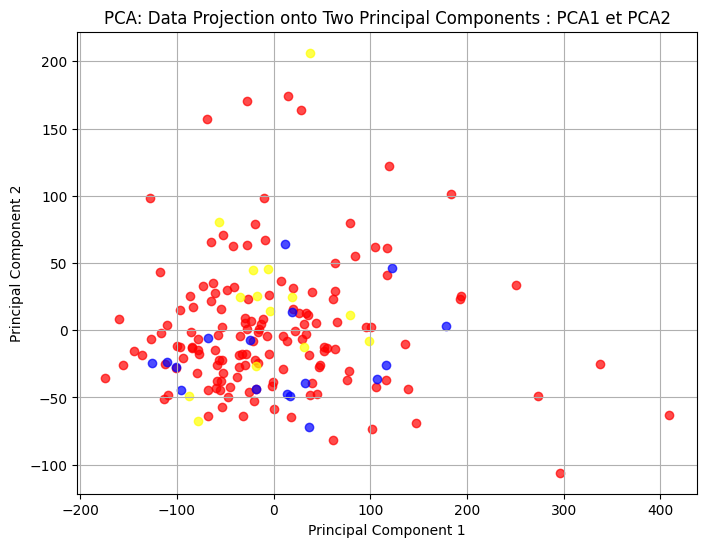

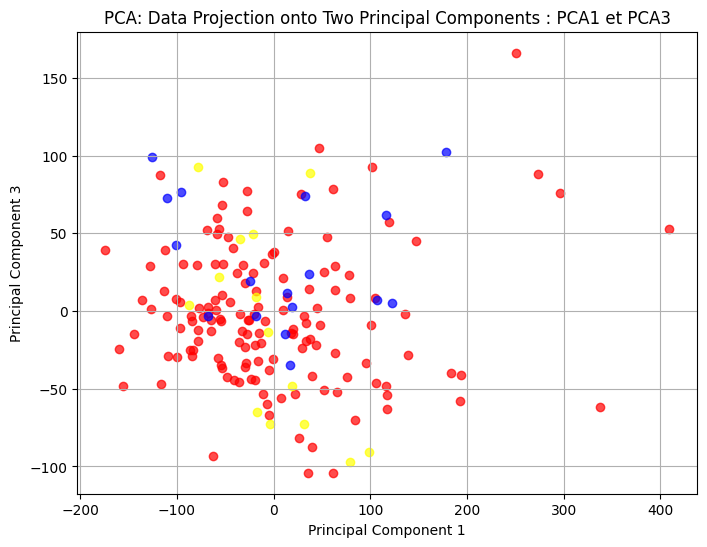

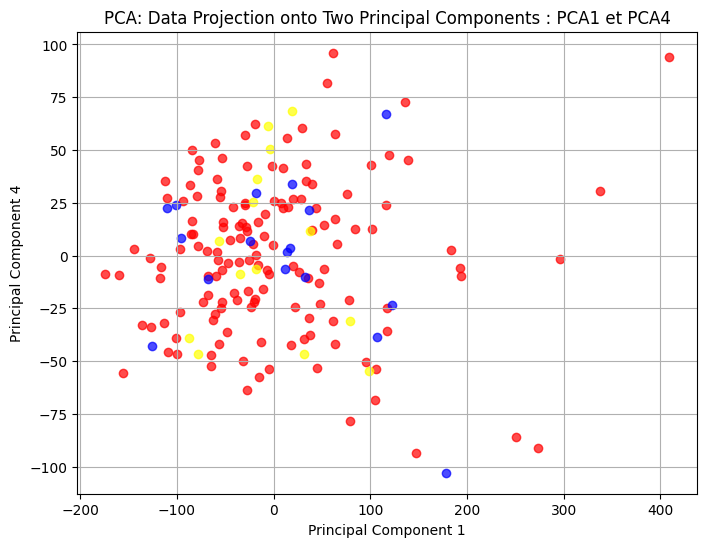

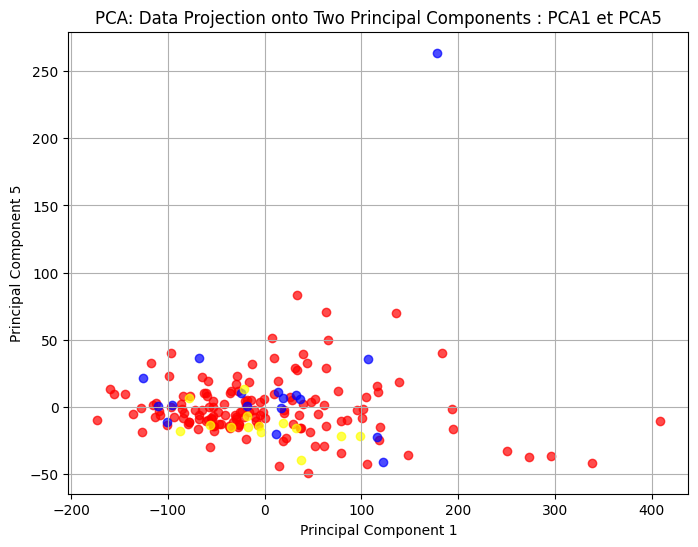

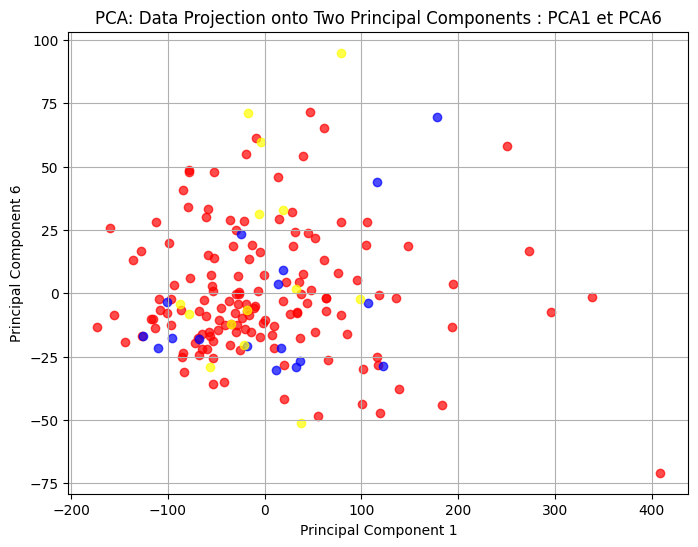

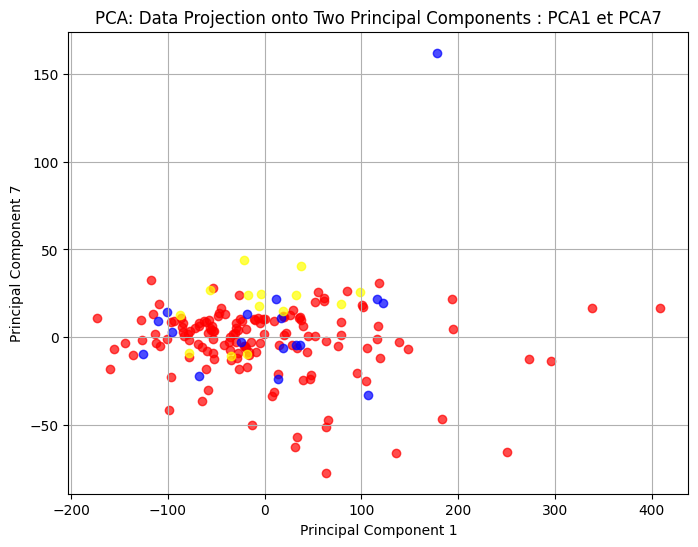

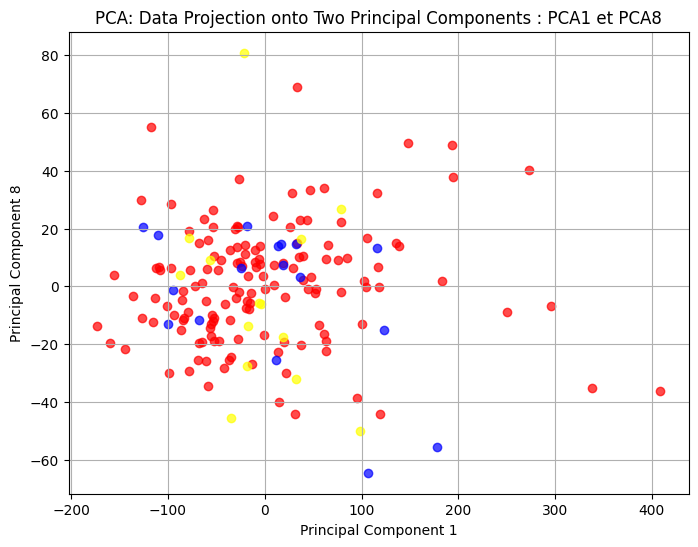

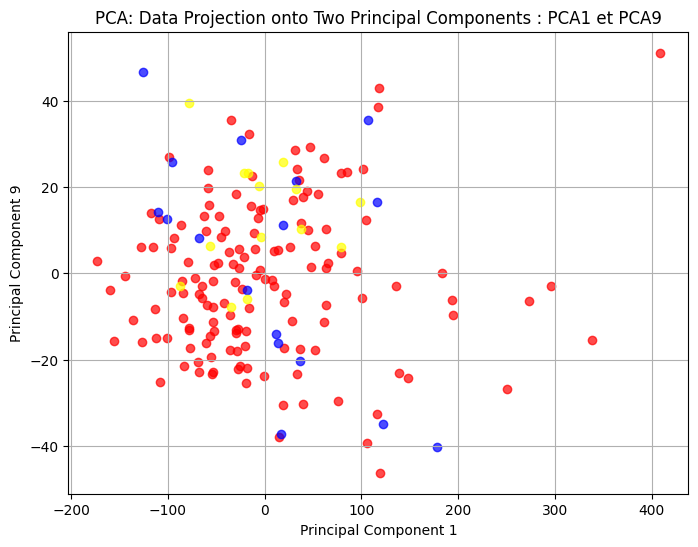

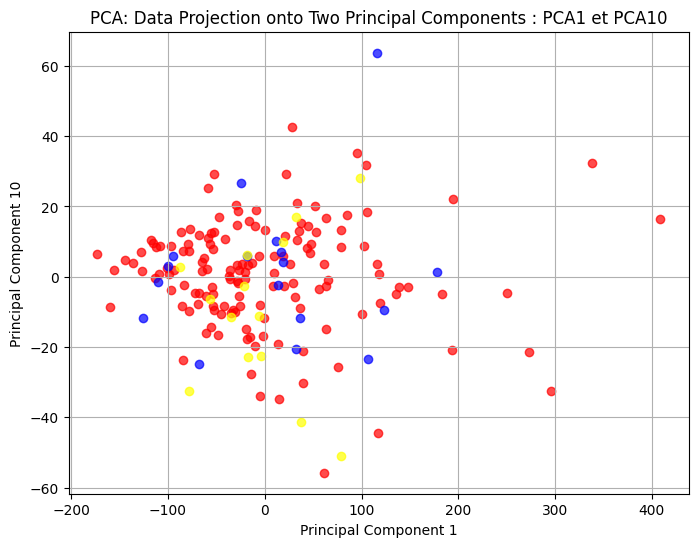

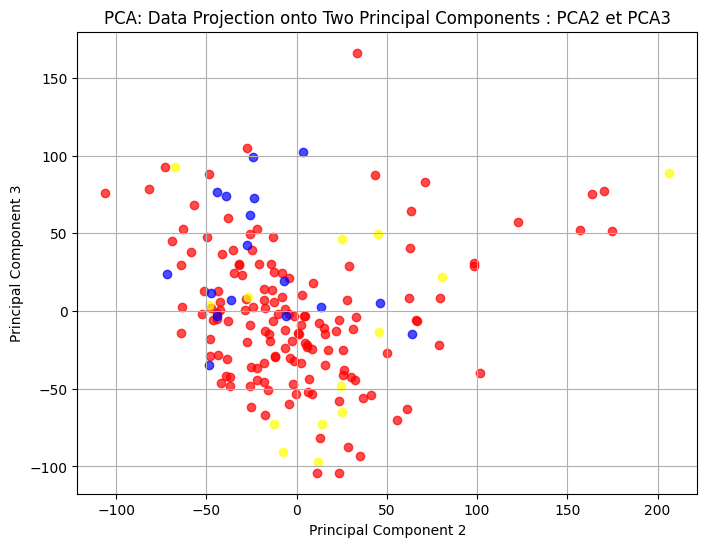

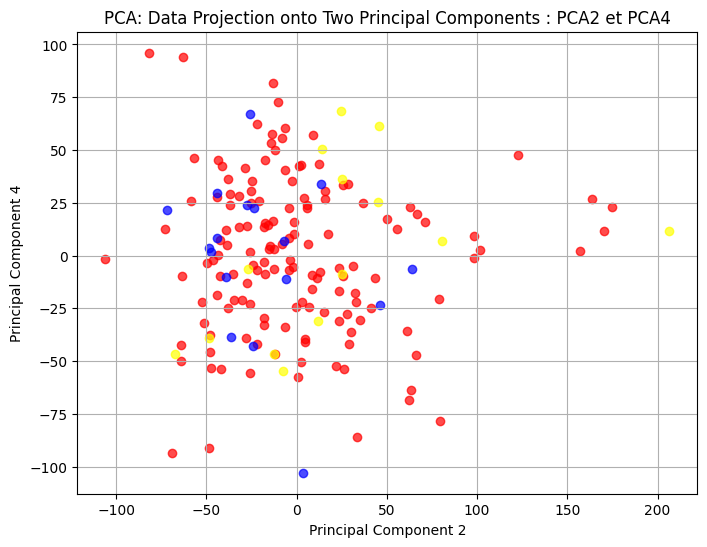

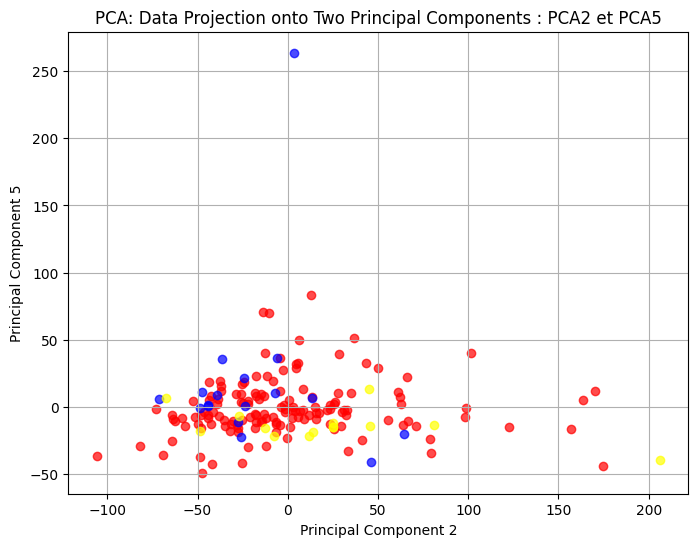

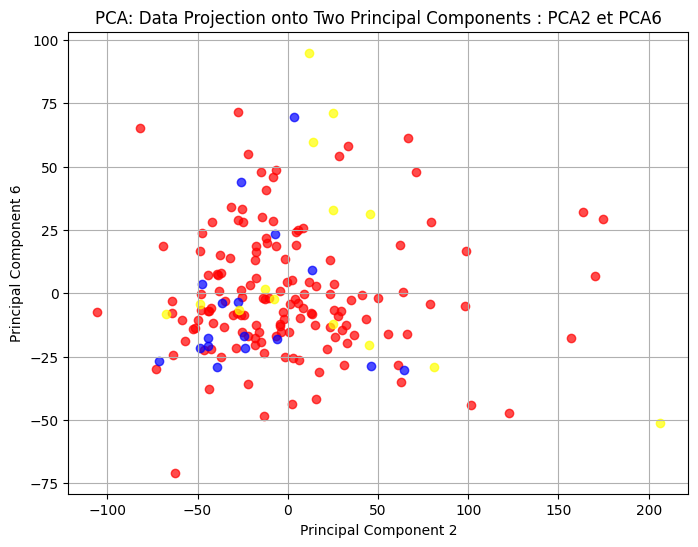

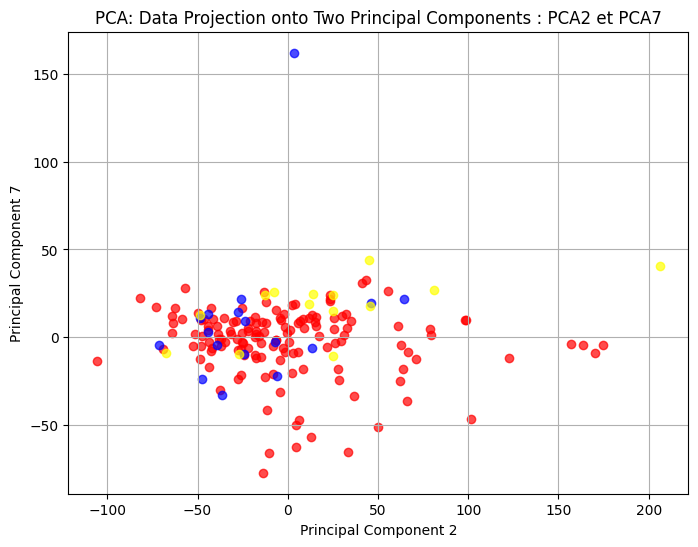

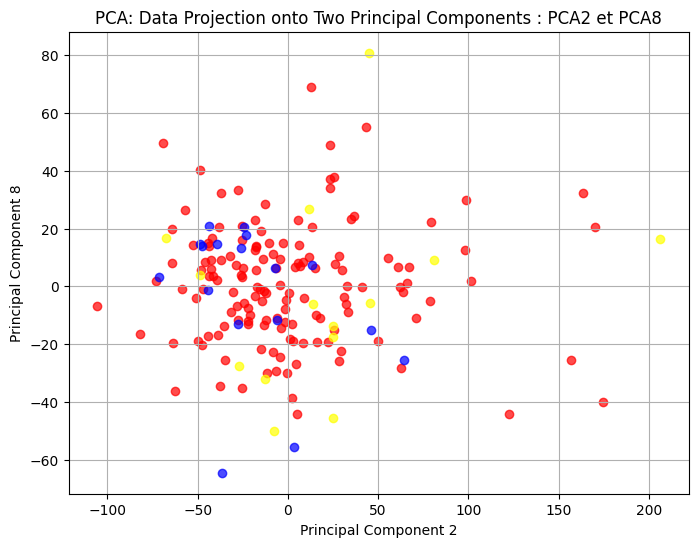

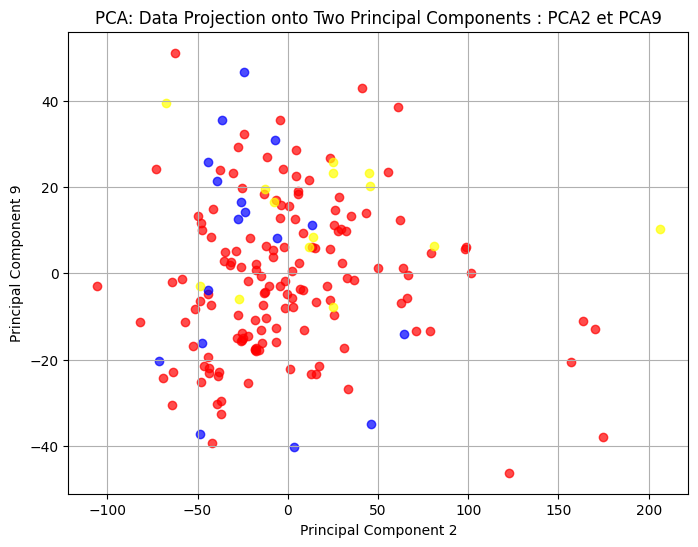

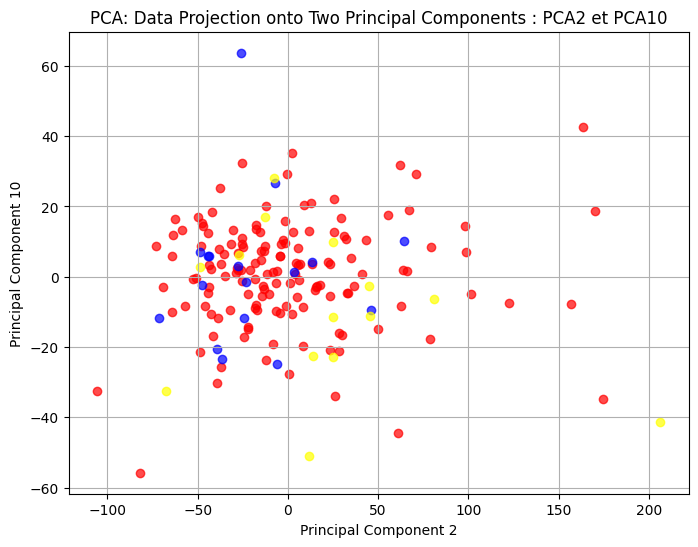

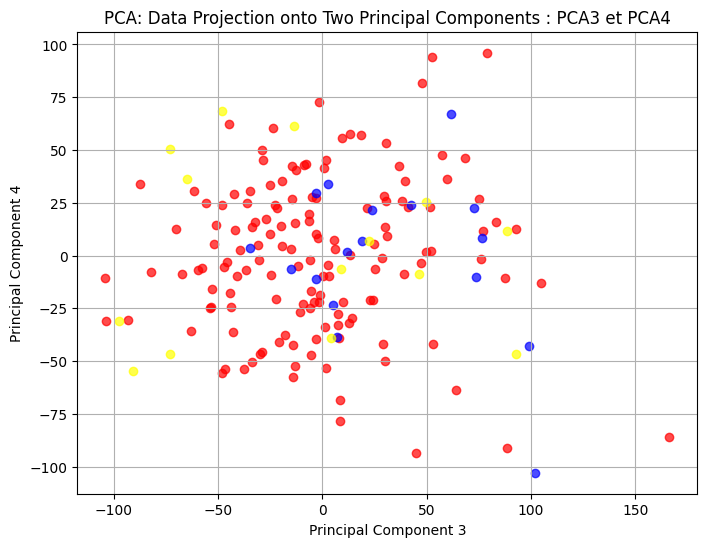

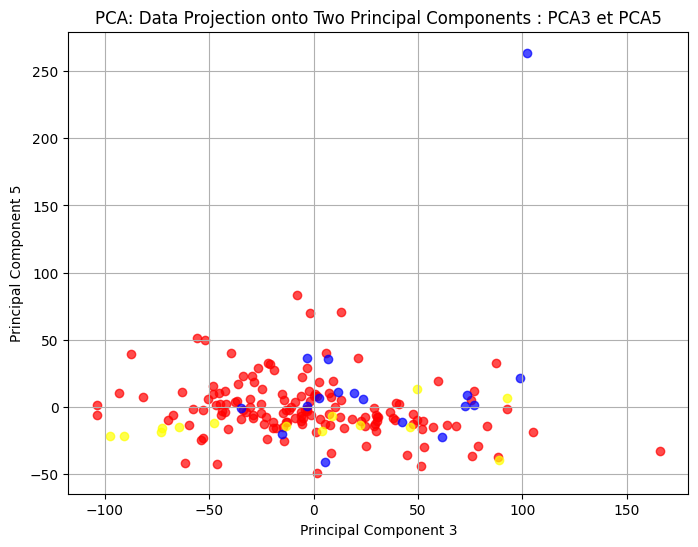

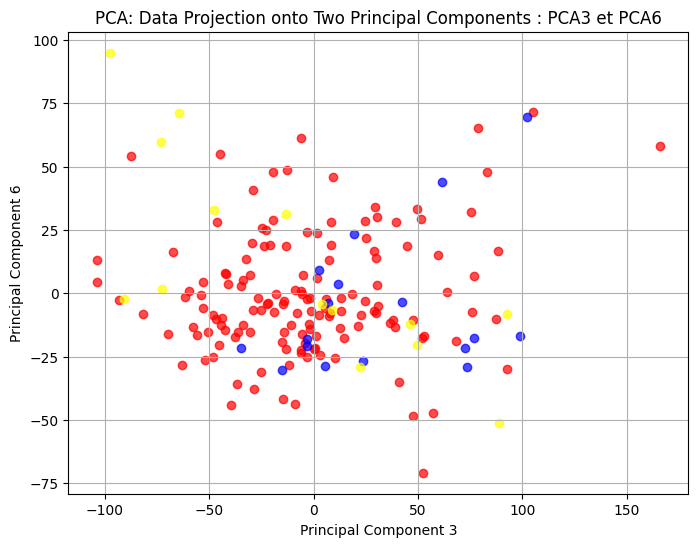

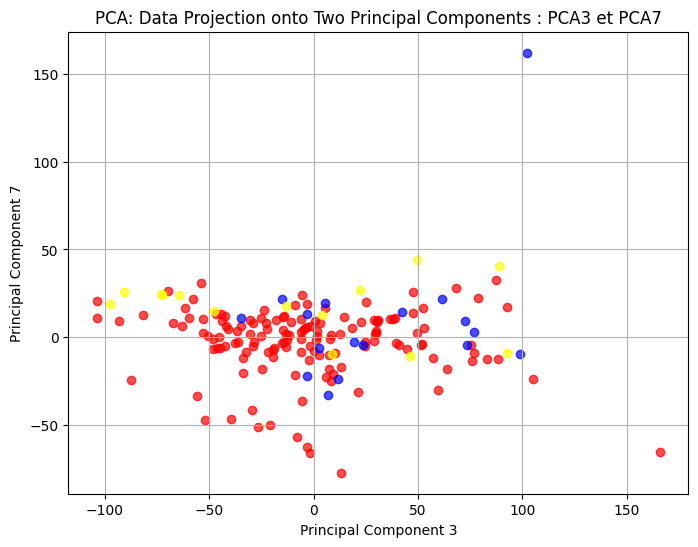

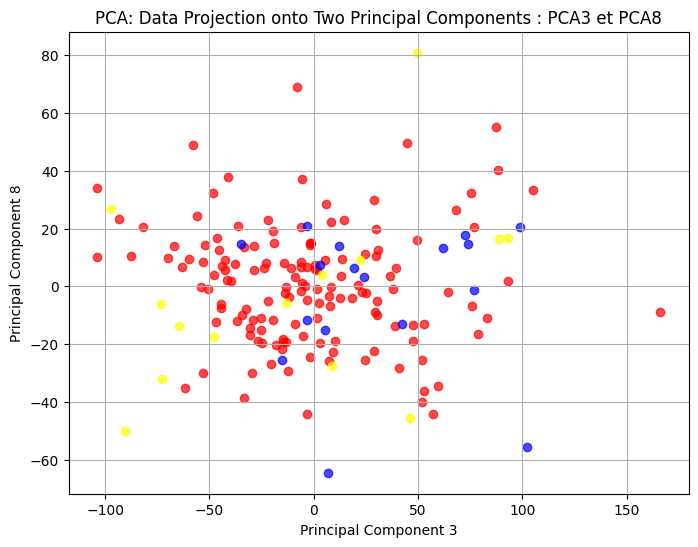

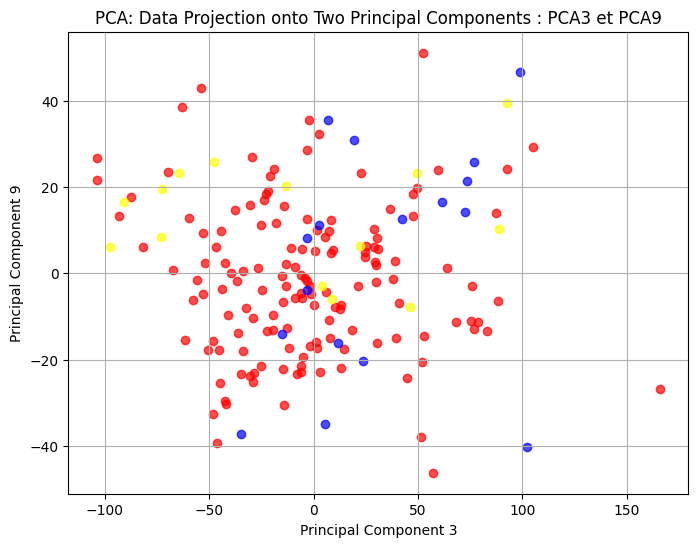

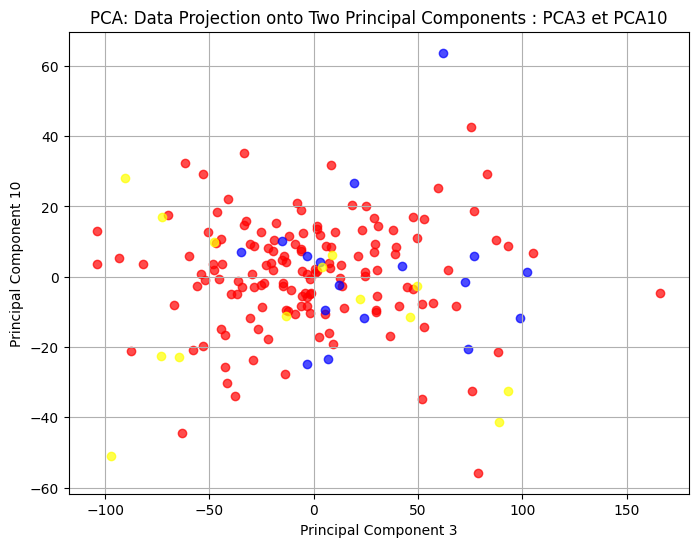

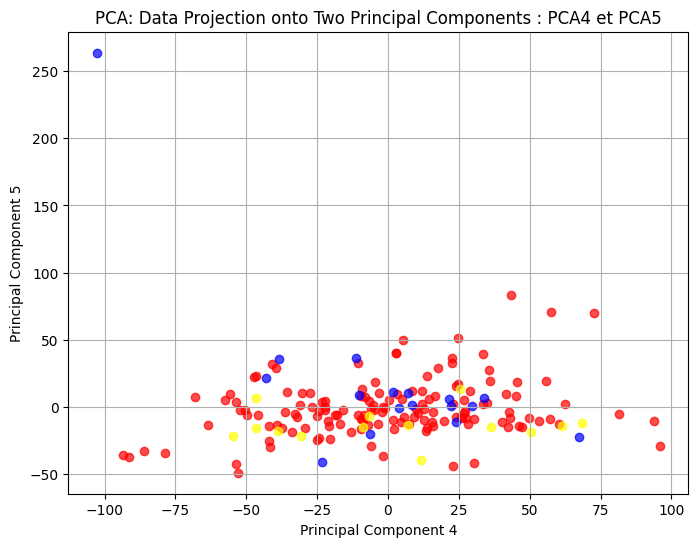

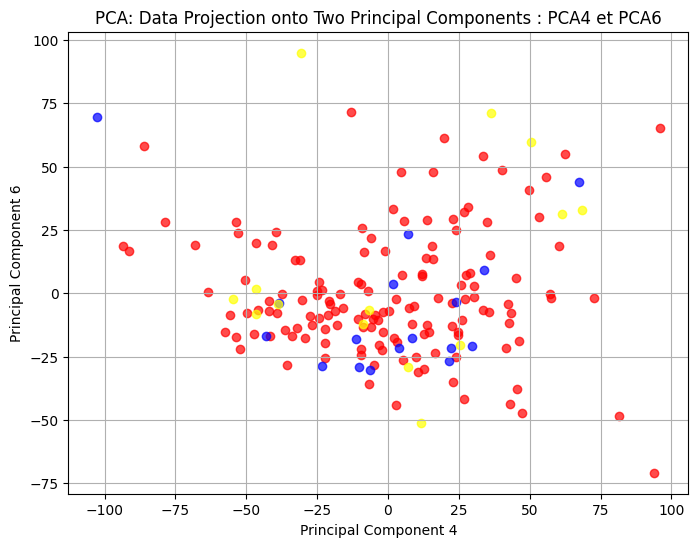

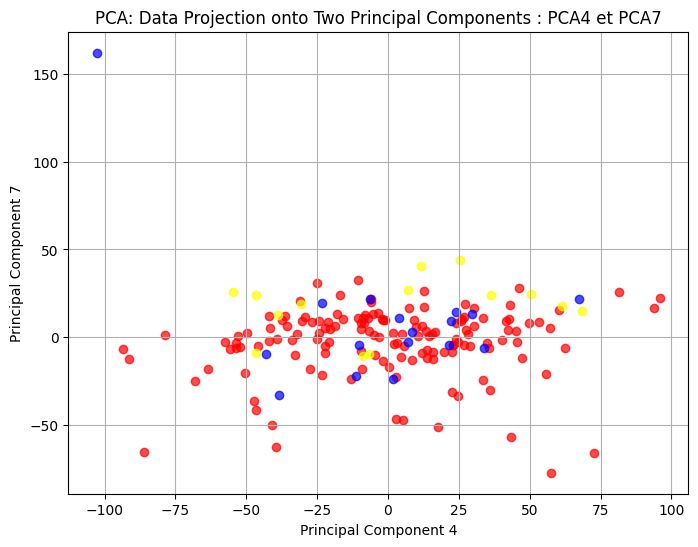

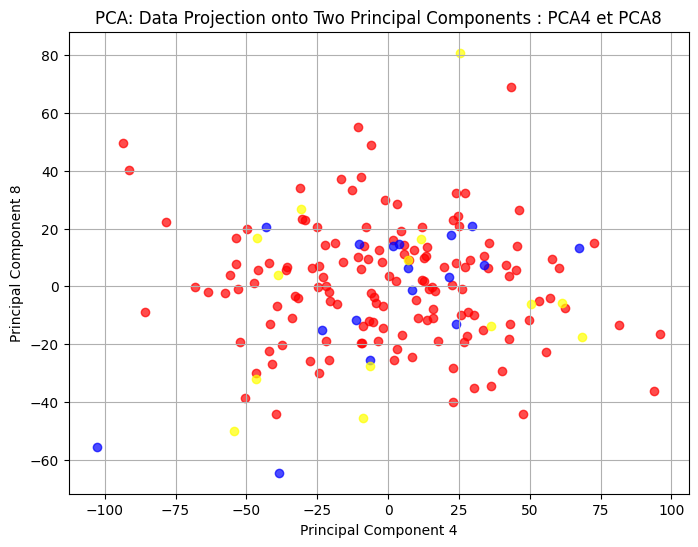

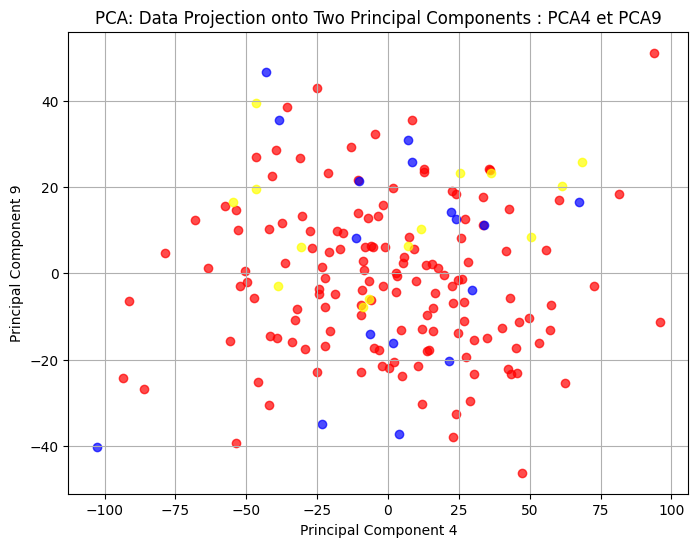

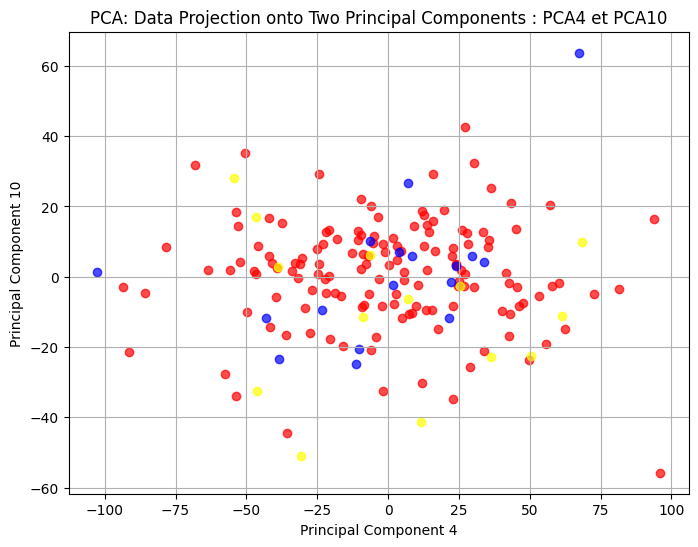

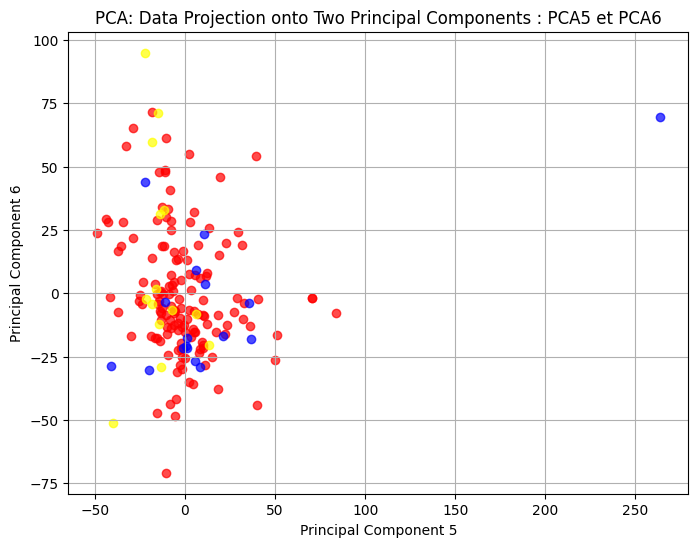

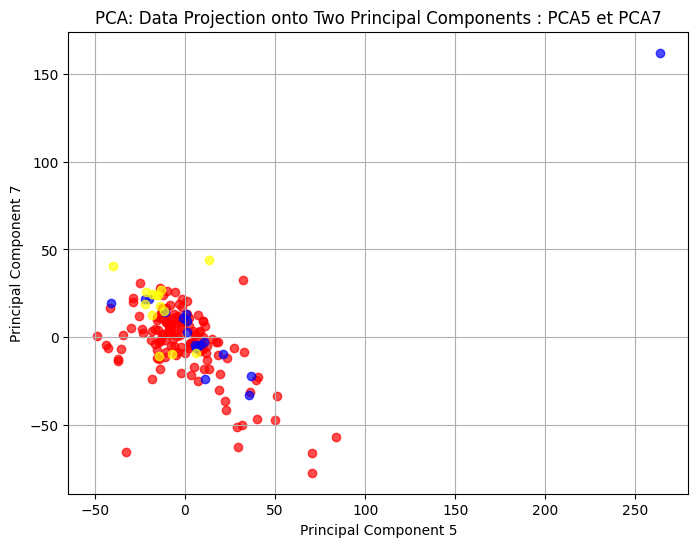

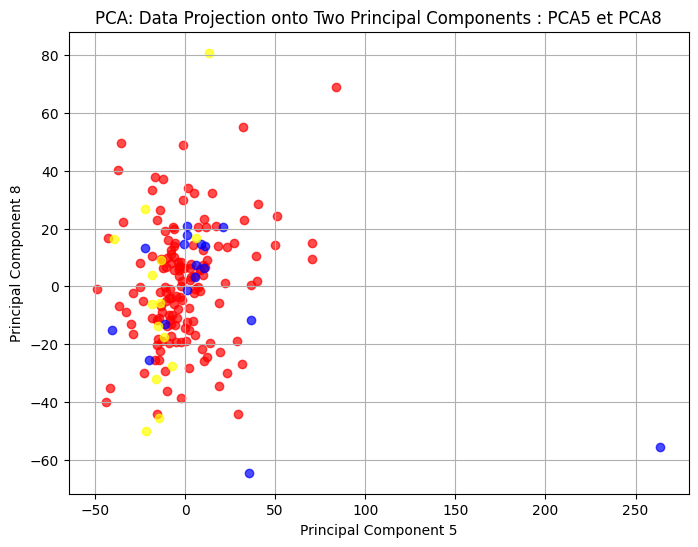

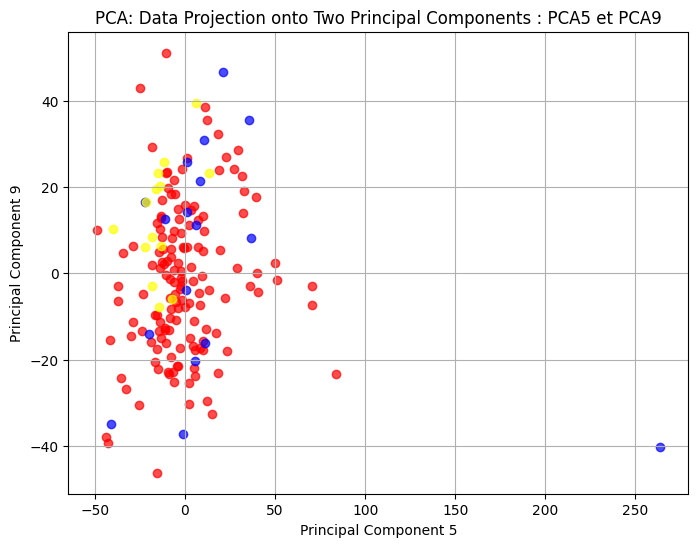

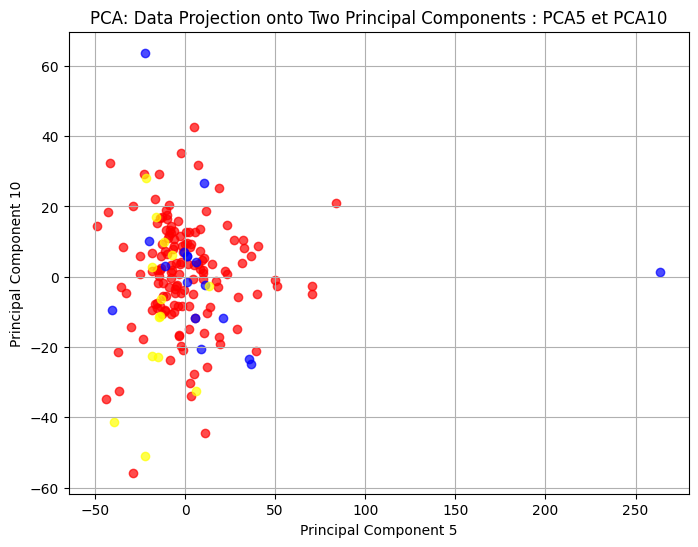

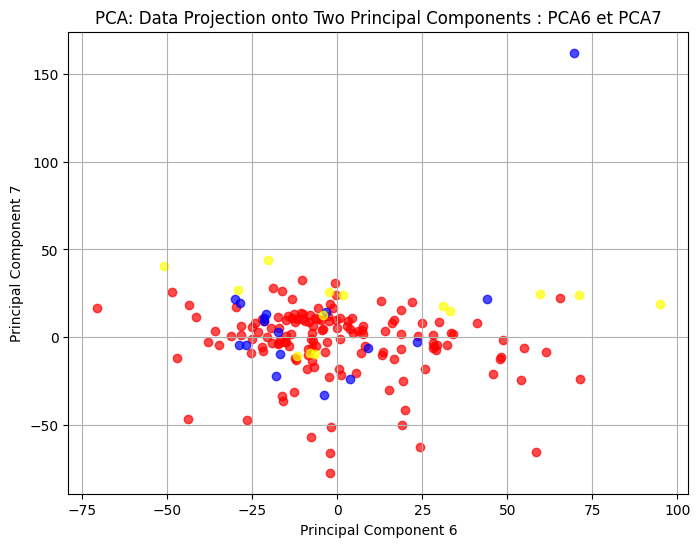

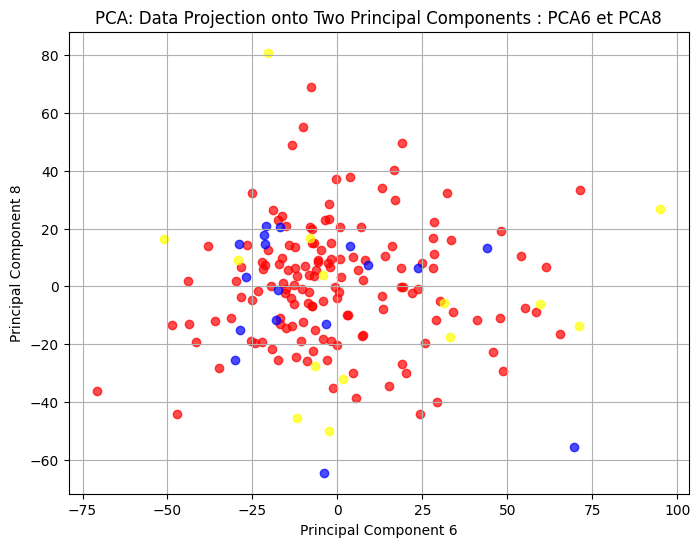

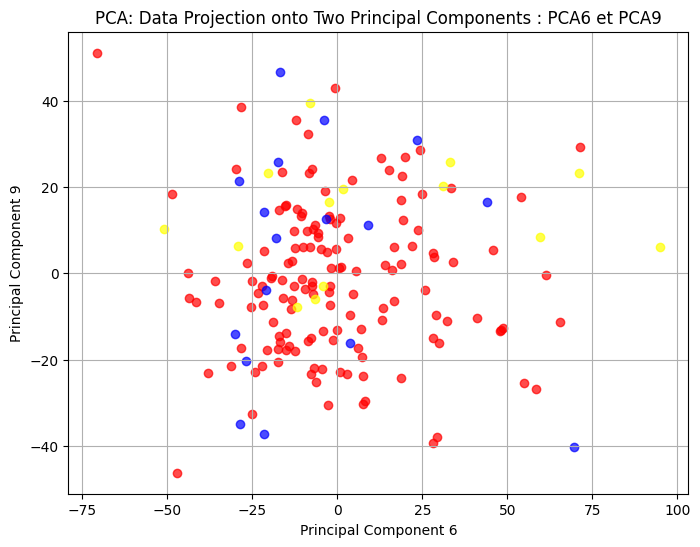

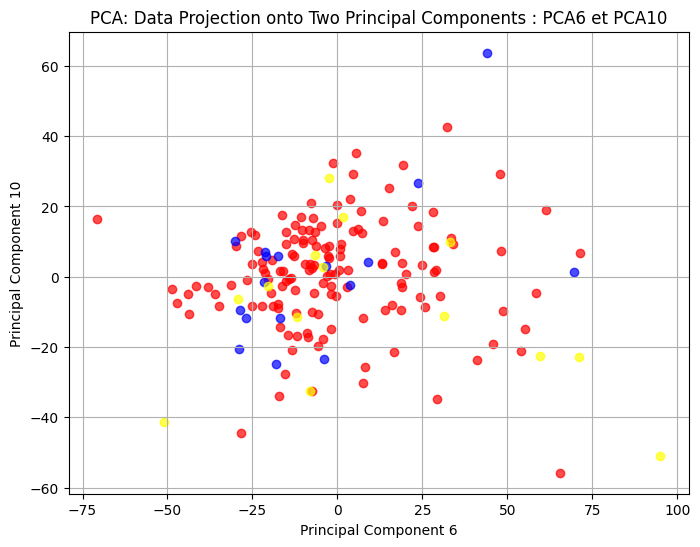

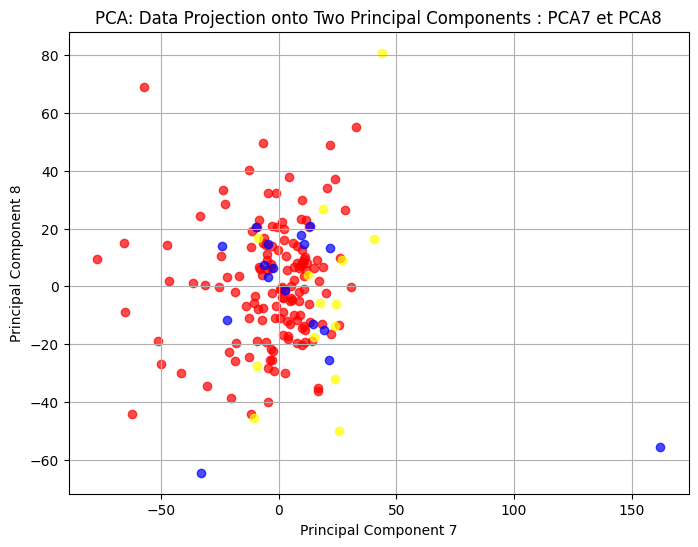

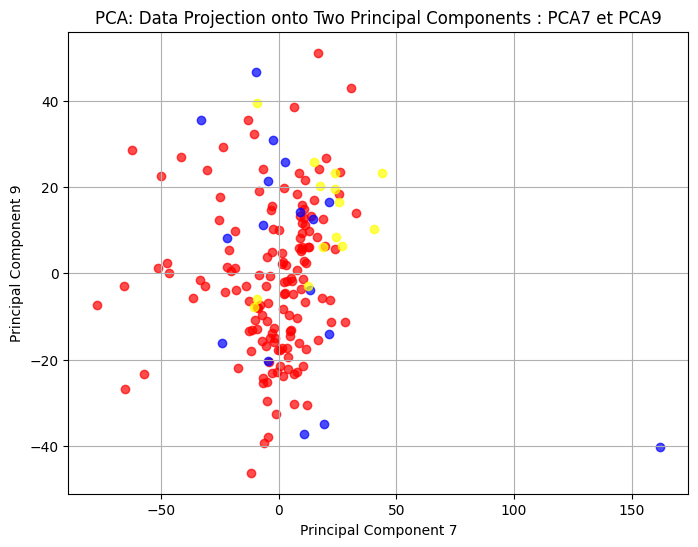

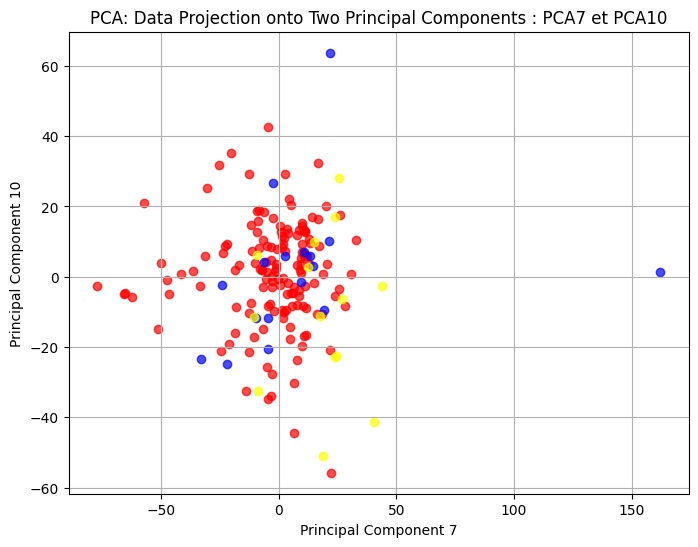

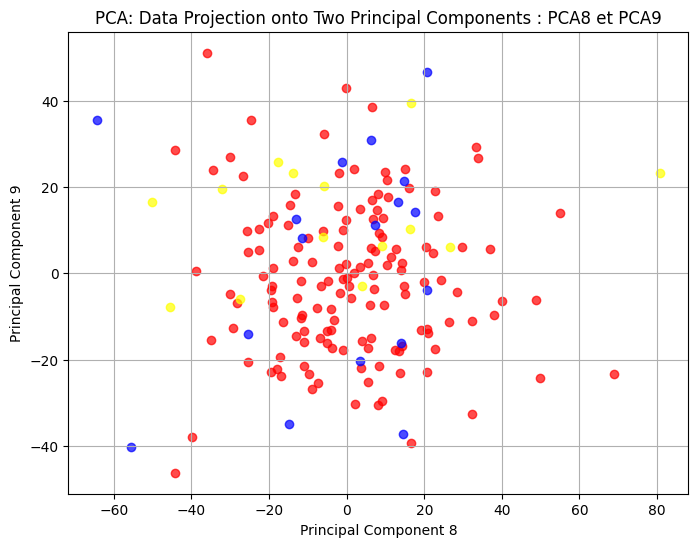

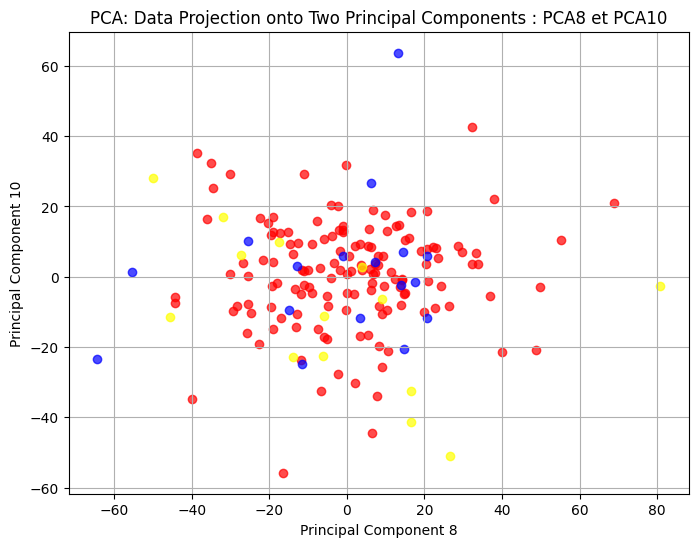

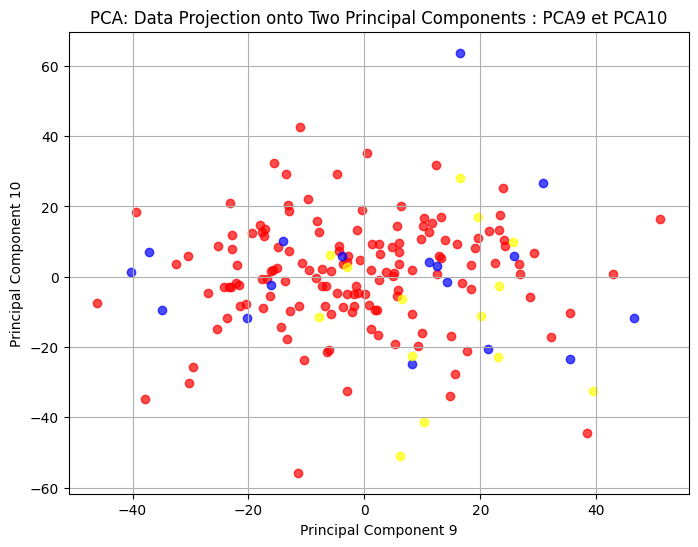

In [84]:
# Scatter plot of PCA results
for i in range(10):
    for j in range(i+1, 10) :

        plt.figure(figsize=(8, 6))
        for label in df_pca["Sample_group"].unique():
            subset = df_pca[df_pca["Sample_group"] == label]
            plt.scatter(subset[components[i]], subset[components[j]], label=label, color=color_map[label], alpha=0.7)
        plt.xlabel("Principal Component "+ str(i + 1 ))
        plt.ylabel("Principal Component " + str(j + 1))
        plt.title("PCA: Data Projection onto Two Principal Components : PCA" + str(i+1) + " et PCA" + str(j+1))
        plt.grid()
        plt.show()

## Step 5

In [85]:
import os
import pickle as pkl

import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [118]:
counts_df = c_data.get_data_genes()
metadata = c_data.get_data_matrix()[['Sample_group']]

In [119]:
samples_to_keep = ~metadata.Sample_group.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [120]:
counts_df

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
Sample_id                                                                
GSM3533230    42       149     0  3327      101     78      4        0   
GSM3533231    25       107     2  1787      153    109      2        1   
GSM3533232    20        95     0  1830      121    127      1        1   
GSM3533233    22       101     0  2131      142    143      5        1   
GSM3533234    22       102     0  1706       83    178      1        3   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533401    23       113     0  2130       72     71      2        3   
GSM3533402   134       300     0  6077      171     42      8        5   
GSM3533403    64       290     0  4752      118    174      8        2   
GSM3533404   124       332     0  3516      141    173      3        2   
GSM3533405    76       193     0  4278      140    102      2        3   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                  ...                                         
GSM3533230      67      0  ...                986               2218   
GSM3533231      25      0  ...               1216               2373   
GSM3533232      11      0  ...                905               2018   
GSM3533233      36      0  ...                935               2278   
GSM3533234      31      0  ...                966               2295   
...            ...    ...  ...                ...                ...   
GSM3533401      21      0  ...                553               1243   
GSM3533402     225      0  ...                719               1988   
GSM3533403     135      0  ...                623               1466   
GSM3533404     192      0  ...                743               1846   
GSM3533405     141      0  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533401               1089                658                 72   
GSM3533402               1691                966                119   
GSM3533403               1246                726                 61   
GSM3533404               1680                936                110   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533401               320               73                     311   
GSM3533402               460              109                     399   
GSM3533403               358              107                     347   
GSM3533404               479              120                     503   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GSM3533230                    2045                   2446  
GSM3533231                    2057                   2279 

In [121]:
metadata

Sample_group
Sample_id                   
GSM3533230  ALS Spectrum MND
GSM3533231  ALS Spectrum MND
GSM3533232  ALS Spectrum MND
GSM3533233  ALS Spectrum MND
GSM3533234  ALS Spectrum MND
...                      ...
GSM3533401  ALS Spectrum MND
GSM3533402  ALS Spectrum MND
GSM3533403  ALS Spectrum MND
GSM3533404  ALS Spectrum MND
GSM3533405  ALS Spectrum MND

[176 rows x 1 columns]

In [122]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [123]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~Sample_group",
    refit_cooks=True,
    inference=inference,
    # n_cpus=8, # n_cpus can be specified here or in the inference object
)

In [124]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 0.54 seconds.

Fitting dispersions...
... done in 32.68 seconds.

Fitting dispersion trend curve...
... done in 3.24 seconds.

Fitting MAP dispersions...
... done in 46.54 seconds.

Fitting LFCs...
... done in 17.08 seconds.

Calculating cook's distance...
... done in 2.15 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.46 seconds.

Fitting MAP dispersions...
... done in 0.48 seconds.

Fitting LFCs...
... done in 0.33 seconds.



In [125]:
print(dds)

AnnData object with n_obs × n_vars = 176 × 26138
    obs: 'Sample_group'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'


In [126]:
print(dds.varm["dispersions"])

[ 0.1214482   0.06439352 16.07114888 ...  0.07966     0.08370202
  0.06874048]


In [127]:
print(dds.varm["LFC"])

                        Intercept  Sample_group[T.Non-Neurological Control]  \
A1BG                     3.576722                                  0.012538   
A1BG-AS1                 4.735475                                  0.036725   
A1CF                    -1.303419                                 -0.409047   
A2M                      7.767150                                  0.082556   
A2M-AS1                  4.605841                                 -0.129266   
...                           ...                                       ...   
X8_LINE:CR1:LINE         6.124011                                  0.040619   
X9_LINE:L1:LINE          4.700201                                 -0.051211   
Zaphod2:hAT-Tip100:DNA   6.019868                                  0.045268   
Zaphod3:hAT-Tip100:DNA   7.335890                                  0.074408   
Zaphod:hAT-Tip100:DNA    7.443054                                  0.058400   

                        Sample_group[T.Other Neurol

In [128]:
# Now that dispersions and LFCs were fitted, we may proceed with statistical tests to
# compute p-values and adjusted p-values for differential expresion. This is the role of
# the :class:`DeseqStats` class. It has two mandatory arguments:
#
# - ``dds``, which should be a *fitted* :class:`DeseqDataSet <pydeseq2.dds.DeseqDataSet>`
#   object,
# - ``contrast``, which is a list of three strings of the form
#   ``["variable", "tested_level", "control_level"]``, or directly a contrast vector.
#

ds = DeseqStats(dds, contrast=["Sample_group", "ALS Spectrum MND", "Non-Neurological Control"], inference=inference)

In [129]:
ds.summary()

Running Wald tests...
... done in 7.72 seconds.



Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902       -0.018088  0.142845 -0.126629   
A1BG-AS1                 113.742747       -0.052983  0.099893 -0.530394   
A1CF                       0.155759        0.590130  1.711141  0.344875   
A2M                     2345.384523       -0.119103  0.159455 -0.746940   
A2M-AS1                   99.268405        0.186492  0.098239  1.898348   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014       -0.058600  0.103843 -0.564318   
X9_LINE:L1:LINE          109.576015        0.073882  0.111311  0.663748   
Zaphod2:hAT-Tip100:DNA   411.010268       -0.065308  0.105925 -0.616552   
Zaphod3:hAT-Tip100:DNA  1539.491230       -0.107348  0.107397 -0.999542   
Zaphod:hAT-Tip100:DNA   1710.104347       -0.084253  0.097365 -0.865327   

   

Running Wald tests...
... done in 16.48 seconds.



Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902       -0.018088  0.142845  0.000000   
A1BG-AS1                 113.742747       -0.052983  0.099893  0.000000   
A1CF                       0.155759        0.590130  1.711141  0.286434   
A2M                     2345.384523       -0.119103  0.159455 -0.119805   
A2M-AS1                   99.268405        0.186492  0.098239  0.880422   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014       -0.058600  0.103843  0.000000   
X9_LINE:L1:LINE          109.576015        0.073882  0.111311  0.000000   
Zaphod2:hAT-Tip100:DNA   411.010268       -0.065308  0.105925  0.000000   
Zaphod3:hAT-Tip100:DNA  1539.491230       -0.107348  0.107397 -0.068417   
Zaphod:hAT-Tip100:DNA   1710.104347       -0.084253  0.097365  0.000000   

   

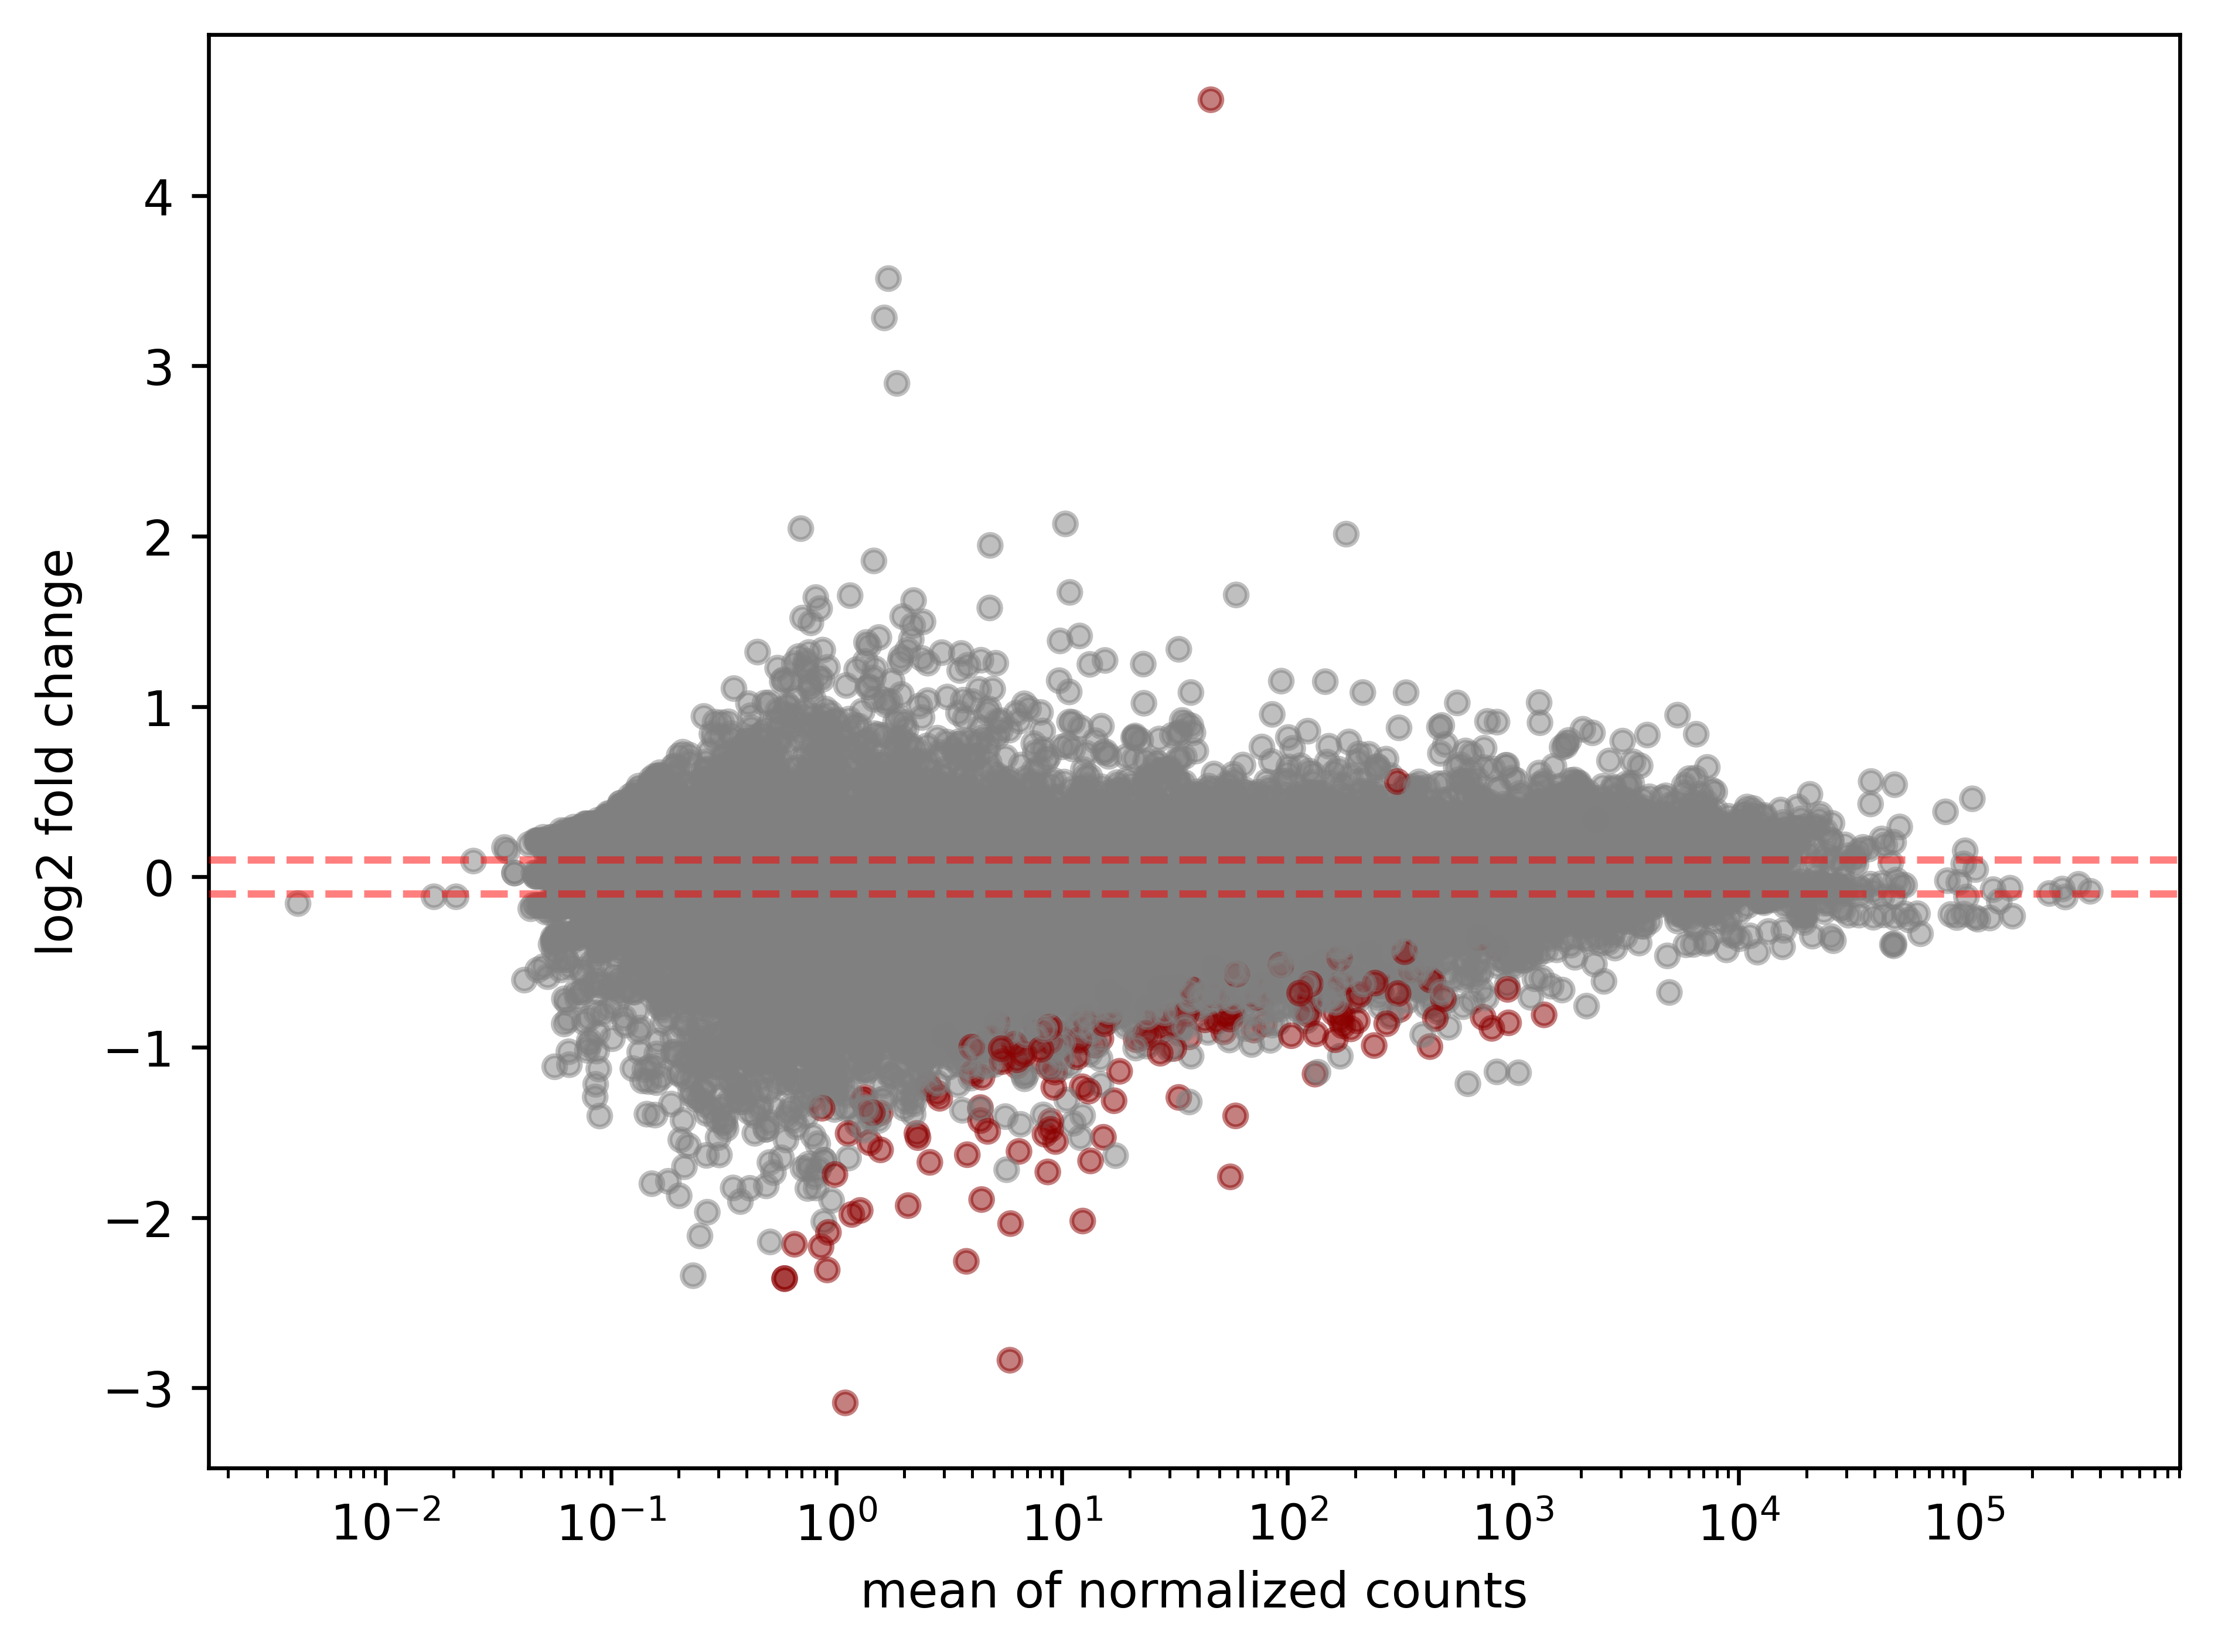

In [130]:
# The user can specify a (log2) log fold change under the null hypothesis and an
# alternative hypothesis to re-compute Wald statistics and p-values.
# The alternative hypothesis corresponds to what the user wants to find rather than the
# null hypothesis. It can take one of the values
# ``["greaterAbs", "lessAbs", "greater", "less"]``.

ds.summary(lfc_null=0.1, alt_hypothesis="greaterAbs")
ds.plot_MA(s=20)

In [131]:
# For visualization or post-processing purposes, it might be suitable to perform
# LFC shrinkage. This is implemented by the :meth:`lfc_shrink() <DeseqStats.lfc_shrink>`
# method, which takes as argument the name of the coefficient to shrink (i.e., the name
# of one of the columns of the design matrix ``dds.obsm["design_matrix"]``).
# For instance, to shrink the LFCs of the ``condition B`` samples, we would run:

ds.lfc_shrink(coeff="Sample_group[T.Non-Neurological Control]")

Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: Sample_group[T.Non-Neurological Control]
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902        0.006731  0.086575  0.000000   
A1BG-AS1                 113.742747        0.030292  0.075337  0.000000   
A1CF                       0.155759       -0.006315  0.109604  0.286434   
A2M                     2345.384523        0.041284  0.095734 -0.119805   
A2M-AS1                   99.268405       -0.124434  0.094542  0.880422   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014        0.030832  0.076960  0.000000   
X9_LINE:L1:LINE          109.576015       -0.037022  0.081554  0.000000   
Zaphod2:hAT-Tip100:DNA   411.010268        0.034426  0.078294  0.000000   
Zaphod3:hAT-Tip100:DNA  1539.491230        0.058696  0.083352 -0.068417   
Zaphod:hAT-Tip100:DNA   1710.104347        0.048997  0.076699  0.000000   

             

... done in 21.27 seconds.



(((((((())))))))

In [132]:


# Set the number of CPUs to use (adjust as per your machine)
inference = DefaultInference(n_cpus=8)

# Create the DESeqDataSet object
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~Sample_group",  # 'Sample_group' will be used to compare the conditions
    refit_cooks=True,
    inference=inference,
)


In [134]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.33 seconds.

Fitting dispersions...
... done in 22.74 seconds.

Fitting dispersion trend curve...
... done in 0.74 seconds.

Fitting MAP dispersions...
... done in 26.98 seconds.

Fitting LFCs...
... done in 15.80 seconds.

Calculating cook's distance...
... done in 1.63 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.58 seconds.

Fitting MAP dispersions...
... done in 0.57 seconds.

Fitting LFCs...
... done in 0.44 seconds.



In [ ]:
# Contrast: specify which groups you want to compare. Adjust based on your design.
contrast = ["Sample_group", "ALS Spectrum MND", "Non-Neurological Control"]  # Compare two conditions (e.g., 'Group A' vs. 'Group B')

# Perform the differential expression analysis
ds = DeseqStats(
    dds,
    contrast=contrast,
    alpha=0.05,  # Set significance threshold for p-value
    cooks_filter=True,  # Remove outliers based on Cook's distance
    independent_filter=True,  # Independent filtering for lowly expressed genes
)


Running Wald tests...


... done in 8.21 seconds.



Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902       -0.018088  0.142845 -0.126629   
A1BG-AS1                 113.742747       -0.052983  0.099893 -0.530394   
A1CF                       0.155759        0.590130  1.711141  0.344875   
A2M                     2345.384523       -0.119103  0.159455 -0.746940   
A2M-AS1                   99.268405        0.186492  0.098239  1.898348   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014       -0.058600  0.103843 -0.564318   
X9_LINE:L1:LINE          109.576015        0.073882  0.111311  0.663748   
Zaphod2:hAT-Tip100:DNA   411.010268       -0.065308  0.105925 -0.616552   
Zaphod3:hAT-Tip100:DNA  1539.491230       -0.107348  0.107397 -0.999542   
Zaphod:hAT-Tip100:DNA   1710.104347       -0.084253  0.097365 -0.865327   

   

AttributeError: 'DeseqStats' object has no attribute 'head'

In [146]:
ds.summary()

Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993902       -0.018088  0.142845 -0.126629   
A1BG-AS1                 113.742747       -0.052983  0.099893 -0.530394   
A1CF                       0.155759        0.590130  1.711141  0.344875   
A2M                     2345.384523       -0.119103  0.159455 -0.746940   
A2M-AS1                   99.268405        0.186492  0.098239  1.898348   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.855014       -0.058600  0.103843 -0.564318   
X9_LINE:L1:LINE          109.576015        0.073882  0.111311  0.663748   
Zaphod2:hAT-Tip100:DNA   411.010268       -0.065308  0.105925 -0.616552   
Zaphod3:hAT-Tip100:DNA  1539.491230       -0.107348  0.107397 -0.999542   
Zaphod:hAT-Tip100:DNA   1710.104347       -0.084253  0.097365 -0.865327   

   

In [150]:
res_df = ds.results_df

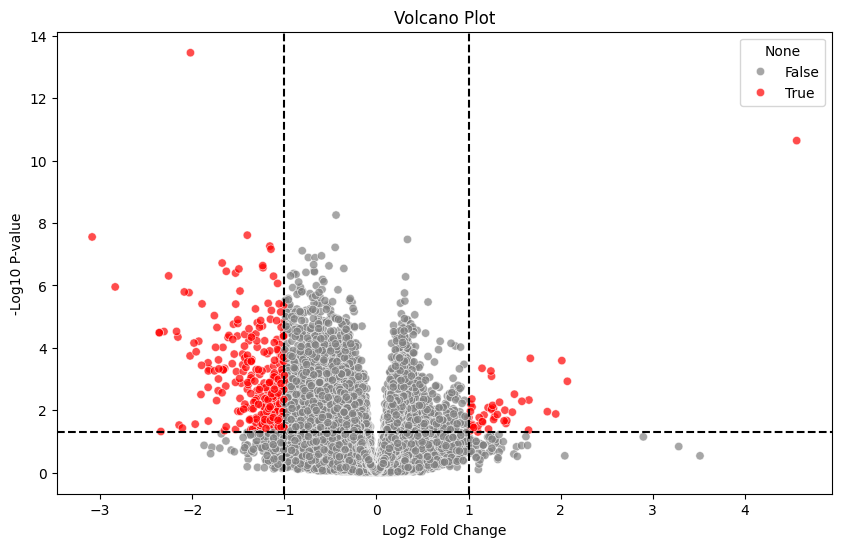

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for -log10(p-value)
res_df['-log10p'] = -np.log10(res_df['pvalue'])

# Set thresholds for significance
significance_threshold = 0.05
log2_fc_threshold = 1  # Adjust based on your data

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_df,
    x='log2FoldChange',
    y='-log10p',
    hue=(res_df['pvalue'] < significance_threshold) & (abs(res_df['log2FoldChange']) > log2_fc_threshold),
    palette={True: 'red', False: 'grey'},
    alpha=0.7
)

# Add threshold lines for significance
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--')  # p-value threshold
plt.axvline(x=-log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold
plt.axvline(x=log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold

# Customize the plot
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value')
plt.show()
